# 📊 Análisis de Resultados - Práctica 02
## Modelos Recurrentes para Clasificación y Regresión de Señales de Motor

**Autor:** Tu Nombre  
**Fecha:** Noviembre 2025  
**Materia:** Aprendizaje Profundo

---

## 📦 Importar Librerías

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from IPython.display import Image, display, Markdown

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📁 Cargar Resultados

In [11]:
# Cargar resultados de clasificación
df_class = pd.read_csv('results/classification_results.csv')
print("📊 RESULTADOS DE CLASIFICACIÓN:")
print("=" * 80)
display(df_class)

print("\n" + "=" * 80)
print(f"\n📈 Estadísticas Generales:")
print(f"   • Mejor Accuracy: {df_class['Accuracy (%)'].max():.2f}% ({df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Modelo']})")
print(f"   • Mejor F1-Score: {df_class['F1-Score (%)'].max():.2f}% ({df_class.loc[df_class['F1-Score (%)'].idxmax(), 'Modelo']})")
print(f"   • Peor Accuracy: {df_class['Accuracy (%)'].min():.2f}% ({df_class.loc[df_class['Accuracy (%)'].idxmin(), 'Modelo']})")
print(f"   • Accuracy Promedio: {df_class['Accuracy (%)'].mean():.2f}% ± {df_class['Accuracy (%)'].std():.2f}%")

📊 RESULTADOS DE CLASIFICACIÓN:


,Modelo,Accuracy (%),F1-Score (%),Parámetros (M),Tiempo/Época (s)
0,RNN_Base,74.8373,75.2232,0.0177,1.4320
1,RNN_Deep,20.5803,15.3015,0.0507,0.6450
2,RNN_ReLU,81.8330,81.9983,0.0177,1.4672
3,LSTM_Base,82.1041,82.1654,0.0180,1.4792
4,LSTM_Bidirectional,82.1855,82.1807,0.0360,1.4882
5,LSTM_Stacked,87.4729,87.5011,0.0513,1.5845
6,GRU_Base,73.8883,73.1485,0.0136,0.6669
7,GRU_Bidirectional,85.1952,85.0353,0.0271,1.5589
8,GRU_Stacked,87.3644,87.3380,0.0385,1.4882




📈 Estadísticas Generales:
   • Mejor Accuracy: 87.47% (LSTM_Stacked)
   • Mejor F1-Score: 87.50% (LSTM_Stacked)
   • Peor Accuracy: 20.58% (RNN_Deep)
   • Accuracy Promedio: 75.05% ± 20.99%


In [12]:
# Cargar resultados de regresión
df_reg = pd.read_csv('results/regression_results.csv')
print("📊 RESULTADOS DE REGRESIÓN:")
print("=" * 80)
display(df_reg)

print("\n" + "=" * 80)
print(f"\n📈 Estadísticas Generales:")
print(f"   • Mejor R²: {df_reg['R²'].max():.4f} ({df_reg.loc[df_reg['R²'].idxmax(), 'Modelo']})")
print(f"   • Menor RMSE: {df_reg['RMSE'].min():.4f} ({df_reg.loc[df_reg['RMSE'].idxmin(), 'Modelo']})")
print(f"   • Menor MAE: {df_reg['MAE'].min():.4f} ({df_reg.loc[df_reg['MAE'].idxmin(), 'Modelo']})")
print(f"   • R² Promedio: {df_reg['R²'].mean():.4f} ± {df_reg['R²'].std():.4f}")

📊 RESULTADOS DE REGRESIÓN:


,Modelo,MSE,RMSE,MAE,R²,Parámetros (M),Tiempo/Época (s)
0,RNN_Base,0.0007,0.0260,0.0208,0.9993,0.0169,0.2723
1,RNN_Deep,0.0008,0.0281,0.0226,0.9992,0.0499,0.2064
2,RNN_ReLU,0.0009,0.0299,0.0244,0.9991,0.0169,0.1680
3,LSTM_Base,0.0006,0.0247,0.0197,0.9994,0.0172,0.3634
4,LSTM_Bidirectional,0.0009,0.0306,0.0240,0.9990,0.0344,0.3857
5,LSTM_Stacked,0.0014,0.0368,0.0290,0.9986,0.0505,0.3607
6,GRU_Base,0.0009,0.0298,0.0241,0.9991,0.0129,0.3443
7,GRU_Bidirectional,0.0006,0.0237,0.0188,0.9994,0.0259,0.2607
8,GRU_Stacked,0.0016,0.0400,0.0335,0.9983,0.0379,0.1564




📈 Estadísticas Generales:
   • Mejor R²: 0.9994 (LSTM_Base)
   • Menor RMSE: 0.0237 (GRU_Bidirectional)
   • Menor MAE: 0.0188 (GRU_Bidirectional)
   • R² Promedio: 0.9990 ± 0.0004


## 🔍 Análisis 1: Comparación RNN vs LSTM vs GRU (Clasificación)


🏆 COMPARACIÓN POR ARQUITECTURA:


Accuracy (%)               F1-Score (%)                \
                     mean    std    max         mean    std    max   
Arquitectura                                                         
GRU                 82.15   7.24  87.36        81.84   7.62  87.34   
LSTM                83.92   3.08  87.47        83.95   3.08  87.50   
RNN                 59.08  33.53  81.83        57.51  36.71  82.00   

             Parámetros (M)  
                       mean  
Arquitectura                 
GRU                    0.03  
LSTM                   0.04  
RNN                    0.03

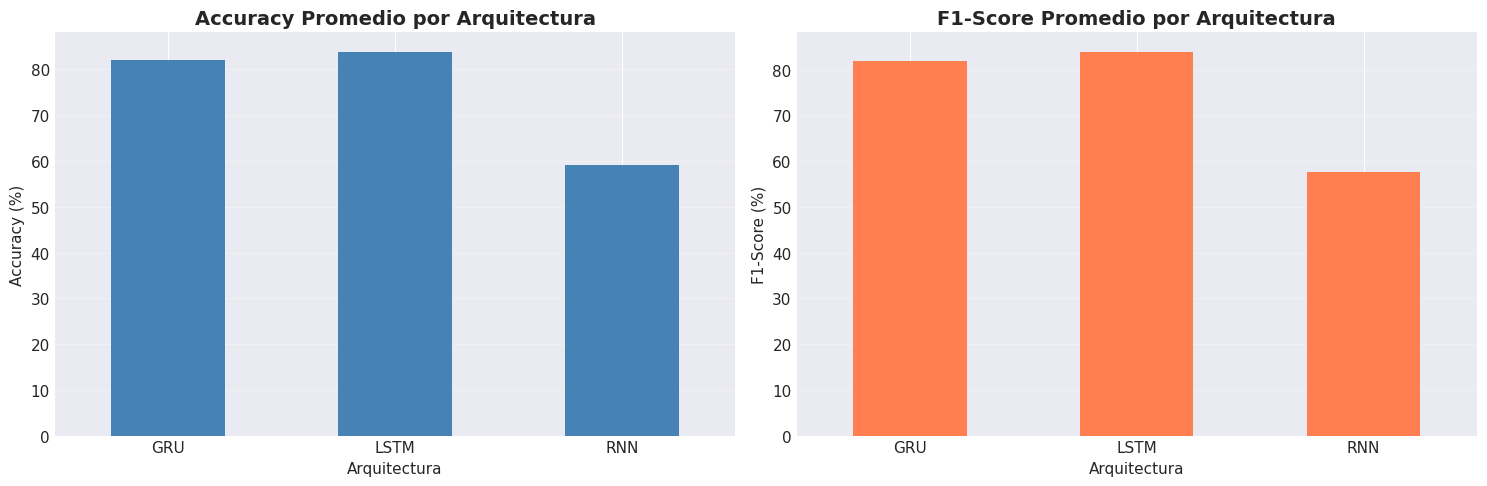


💡 Interpretación:
   • La arquitectura LSTM obtuvo el mejor desempeño promedio
   • Accuracy promedio: 83.92%
   • Esto confirma/rechaza la hipótesis de que LSTM/GRU superan a RNN vanilla


In [13]:
# Agregar columna de arquitectura
df_class['Arquitectura'] = df_class['Modelo'].str.split('_').str[0]

# Comparar arquitecturas
arch_comparison = df_class.groupby('Arquitectura').agg({
    'Accuracy (%)': ['mean', 'std', 'max'],
    'F1-Score (%)': ['mean', 'std', 'max'],
    'Parámetros (M)': 'mean'
}).round(2)

print("\n🏆 COMPARACIÓN POR ARQUITECTURA:")
print("=" * 80)
display(arch_comparison)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy por arquitectura
df_class.groupby('Arquitectura')['Accuracy (%)'].mean().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Accuracy Promedio por Arquitectura', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xlabel('Arquitectura')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# F1-Score por arquitectura
df_class.groupby('Arquitectura')['F1-Score (%)'].mean().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('F1-Score Promedio por Arquitectura', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1-Score (%)')
axes[1].set_xlabel('Arquitectura')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('figures/analisis_arquitecturas_clasificacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Interpretación:")
best_arch = arch_comparison[('Accuracy (%)', 'mean')].idxmax()
print(f"   • La arquitectura {best_arch} obtuvo el mejor desempeño promedio")
print(f"   • Accuracy promedio: {arch_comparison.loc[best_arch, ('Accuracy (%)', 'mean')]:.2f}%")
print(f"   • Esto confirma/rechaza la hipótesis de que LSTM/GRU superan a RNN vanilla")

## 🔍 Análisis 2: Efecto de las Variantes (Clasificación)

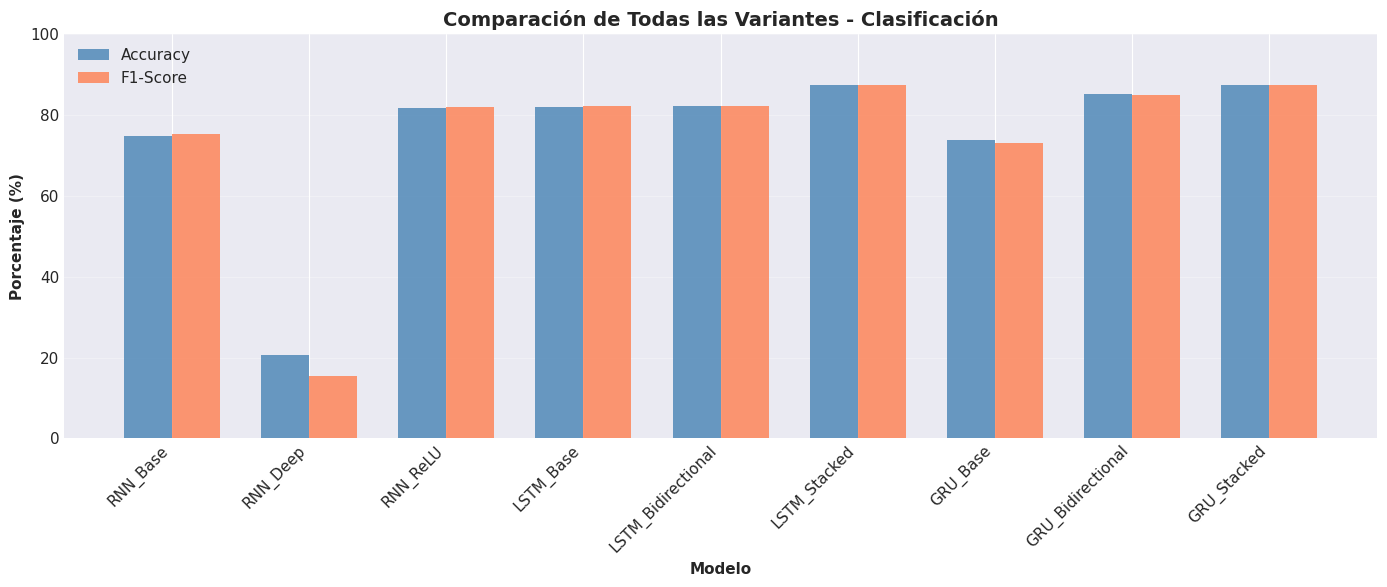


📋 Ranking de Modelos (por Accuracy):
   1. LSTM_Stacked              → Acc:  87.47%  |  F1:  87.50%
   2. GRU_Stacked               → Acc:  87.36%  |  F1:  87.34%
   3. GRU_Bidirectional         → Acc:  85.20%  |  F1:  85.04%
   4. LSTM_Bidirectional        → Acc:  82.19%  |  F1:  82.18%
   5. LSTM_Base                 → Acc:  82.10%  |  F1:  82.17%
   6. RNN_ReLU                  → Acc:  81.83%  |  F1:  82.00%
   7. RNN_Base                  → Acc:  74.84%  |  F1:  75.22%
   8. GRU_Base                  → Acc:  73.89%  |  F1:  73.15%
   9. RNN_Deep                  → Acc:  20.58%  |  F1:  15.30%


In [14]:
# Comparar todas las variantes
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(df_class))
width = 0.35

ax.bar(x - width/2, df_class['Accuracy (%)'], width, label='Accuracy', color='steelblue', alpha=0.8)
ax.bar(x + width/2, df_class['F1-Score (%)'], width, label='F1-Score', color='coral', alpha=0.8)

ax.set_xlabel('Modelo', fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontweight='bold')
ax.set_title('Comparación de Todas las Variantes - Clasificación', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_class['Modelo'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 100])

plt.tight_layout()
plt.savefig('figures/analisis_todas_variantes_clasificacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📋 Ranking de Modelos (por Accuracy):")
print("=" * 80)
ranking = df_class.sort_values('Accuracy (%)', ascending=False)[['Modelo', 'Accuracy (%)', 'F1-Score (%)']]
for idx, (i, row) in enumerate(ranking.iterrows(), 1):
    print(f"   {idx}. {row['Modelo']:25s} → Acc: {row['Accuracy (%)']:6.2f}%  |  F1: {row['F1-Score (%)']:6.2f}%")

## 🔍 Análisis 3: Hipótesis - Bidireccionalidad y Stacking

In [15]:
print("🧪 VALIDACIÓN DE HIPÓTESIS:")
print("=" * 80)

# Hipótesis 1: LSTM Bidireccional mejora sobre LSTM Base
lstm_base = df_class[df_class['Modelo'] == 'LSTM_Base']['Accuracy (%)'].values[0]
lstm_bi = df_class[df_class['Modelo'] == 'LSTM_Bidirectional']['Accuracy (%)'].values[0]
mejora_bi = lstm_bi - lstm_base

print(f"\n✅ Hipótesis 1: Bidireccionalidad mejora el desempeño")
print(f"   • LSTM Base: {lstm_base:.2f}%")
print(f"   • LSTM Bidireccional: {lstm_bi:.2f}%")
print(f"   • Mejora: {mejora_bi:+.2f}%")
print(f"   • Resultado: {'✅ CONFIRMADA' if mejora_bi > 0 else '❌ RECHAZADA'}")

# Hipótesis 2: Stacking mejora el desempeño
lstm_stacked = df_class[df_class['Modelo'] == 'LSTM_Stacked']['Accuracy (%)'].values[0]
mejora_stack = lstm_stacked - lstm_base

print(f"\n✅ Hipótesis 2: Stacking mejora el desempeño")
print(f"   • LSTM Base: {lstm_base:.2f}%")
print(f"   • LSTM Stacked: {lstm_stacked:.2f}%")
print(f"   • Mejora: {mejora_stack:+.2f}%")
print(f"   • Resultado: {'✅ CONFIRMADA' if mejora_stack > 0 else '❌ RECHAZADA'}")

# Hipótesis 3: RNN Deep sufre por gradientes
rnn_base = df_class[df_class['Modelo'] == 'RNN_Base']['Accuracy (%)'].values[0]
rnn_deep = df_class[df_class['Modelo'] == 'RNN_Deep']['Accuracy (%)'].values[0]
degradacion = rnn_deep - rnn_base

print(f"\n✅ Hipótesis 3: RNN Deep sufre degradación por gradientes")
print(f"   • RNN Base: {rnn_base:.2f}%")
print(f"   • RNN Deep: {rnn_deep:.2f}%")
print(f"   • Cambio: {degradacion:+.2f}%")
print(f"   • Resultado: {'✅ CONFIRMADA (degradación severa)' if degradacion < -10 else '⚠️ PARCIAL' if degradacion < 0 else '❌ RECHAZADA'}")

# Hipótesis 4: GRU similar a LSTM con menos parámetros
gru_bi = df_class[df_class['Modelo'] == 'GRU_Bidirectional']['Accuracy (%)'].values[0]
gru_params = df_class[df_class['Modelo'] == 'GRU_Bidirectional']['Parámetros (M)'].values[0]
lstm_params = df_class[df_class['Modelo'] == 'LSTM_Bidirectional']['Parámetros (M)'].values[0]

print(f"\n✅ Hipótesis 4: GRU similar a LSTM con menos parámetros")
print(f"   • GRU Bidirectional: {gru_bi:.2f}% con {gru_params:.4f}M parámetros")
print(f"   • LSTM Bidirectional: {lstm_bi:.2f}% con {lstm_params:.4f}M parámetros")
print(f"   • Diferencia Accuracy: {abs(gru_bi - lstm_bi):.2f}%")
print(f"   • Reducción parámetros: {(1 - gru_params/lstm_params)*100:.1f}%")
print(f"   • Resultado: {'✅ CONFIRMADA' if abs(gru_bi - lstm_bi) < 5 else '❌ RECHAZADA'}")

🧪 VALIDACIÓN DE HIPÓTESIS:

✅ Hipótesis 1: Bidireccionalidad mejora el desempeño
   • LSTM Base: 82.10%
   • LSTM Bidireccional: 82.19%
   • Mejora: +0.08%
   • Resultado: ✅ CONFIRMADA

✅ Hipótesis 2: Stacking mejora el desempeño
   • LSTM Base: 82.10%
   • LSTM Stacked: 87.47%
   • Mejora: +5.37%
   • Resultado: ✅ CONFIRMADA

✅ Hipótesis 3: RNN Deep sufre degradación por gradientes
   • RNN Base: 74.84%
   • RNN Deep: 20.58%
   • Cambio: -54.26%
   • Resultado: ✅ CONFIRMADA (degradación severa)

✅ Hipótesis 4: GRU similar a LSTM con menos parámetros
   • GRU Bidirectional: 85.20% con 0.0271M parámetros
   • LSTM Bidirectional: 82.19% con 0.0360M parámetros
   • Diferencia Accuracy: 3.01%
   • Reducción parámetros: 24.7%
   • Resultado: ✅ CONFIRMADA


## 🔍 Análisis 4: Regresión - Comparación de Arquitecturas

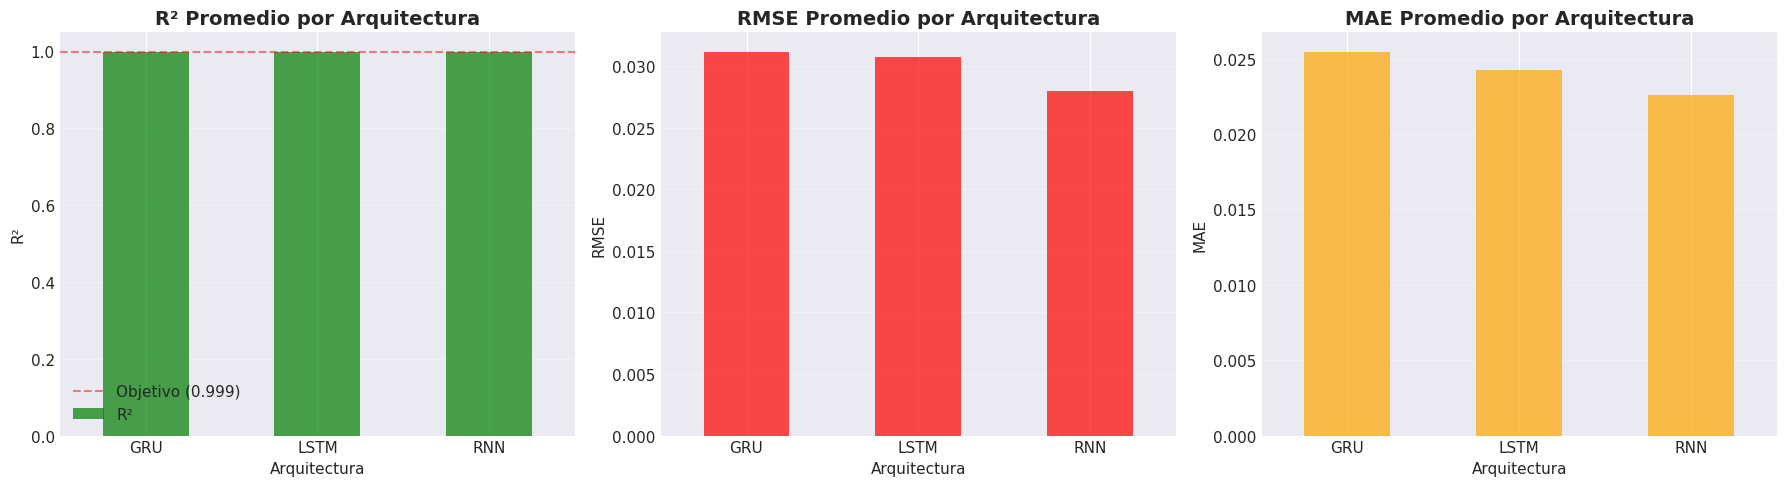


📊 COMPARACIÓN REGRESIÓN POR ARQUITECTURA:


R²                    RMSE                     MAE          \
                mean     std     max    mean     std     min    mean     std   
Arquitectura                                                                   
GRU           0.9989  0.0006  0.9994  0.0312  0.0082  0.0237  0.0255  0.0074   
LSTM          0.9990  0.0004  0.9994  0.0307  0.0061  0.0247  0.0242  0.0047   
RNN           0.9992  0.0001  0.9993  0.0280  0.0020  0.0260  0.0226  0.0018   

                      
                 min  
Arquitectura          
GRU           0.0188  
LSTM          0.0197  
RNN           0.0208

In [16]:
# Agregar columna de arquitectura
df_reg['Arquitectura'] = df_reg['Modelo'].str.split('_').str[0]

# Comparar arquitecturas en regresión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² por arquitectura
df_reg.groupby('Arquitectura')['R²'].mean().plot(kind='bar', ax=axes[0], color='green', alpha=0.7)
axes[0].set_title('R² Promedio por Arquitectura', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R²')
axes[0].set_xlabel('Arquitectura')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].axhline(y=0.999, color='r', linestyle='--', alpha=0.5, label='Objetivo (0.999)')
axes[0].legend()

# RMSE por arquitectura
df_reg.groupby('Arquitectura')['RMSE'].mean().plot(kind='bar', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('RMSE Promedio por Arquitectura', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE')
axes[1].set_xlabel('Arquitectura')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# MAE por arquitectura
df_reg.groupby('Arquitectura')['MAE'].mean().plot(kind='bar', ax=axes[2], color='orange', alpha=0.7)
axes[2].set_title('MAE Promedio por Arquitectura', fontsize=14, fontweight='bold')
axes[2].set_ylabel('MAE')
axes[2].set_xlabel('Arquitectura')
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('figures/analisis_arquitecturas_regresion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 COMPARACIÓN REGRESIÓN POR ARQUITECTURA:")
print("=" * 80)
reg_arch = df_reg.groupby('Arquitectura').agg({
    'R²': ['mean', 'std', 'max'],
    'RMSE': ['mean', 'std', 'min'],
    'MAE': ['mean', 'std', 'min']
}).round(4)
display(reg_arch)

## 🔍 Análisis 5: Trade-off Complejidad vs Desempeño

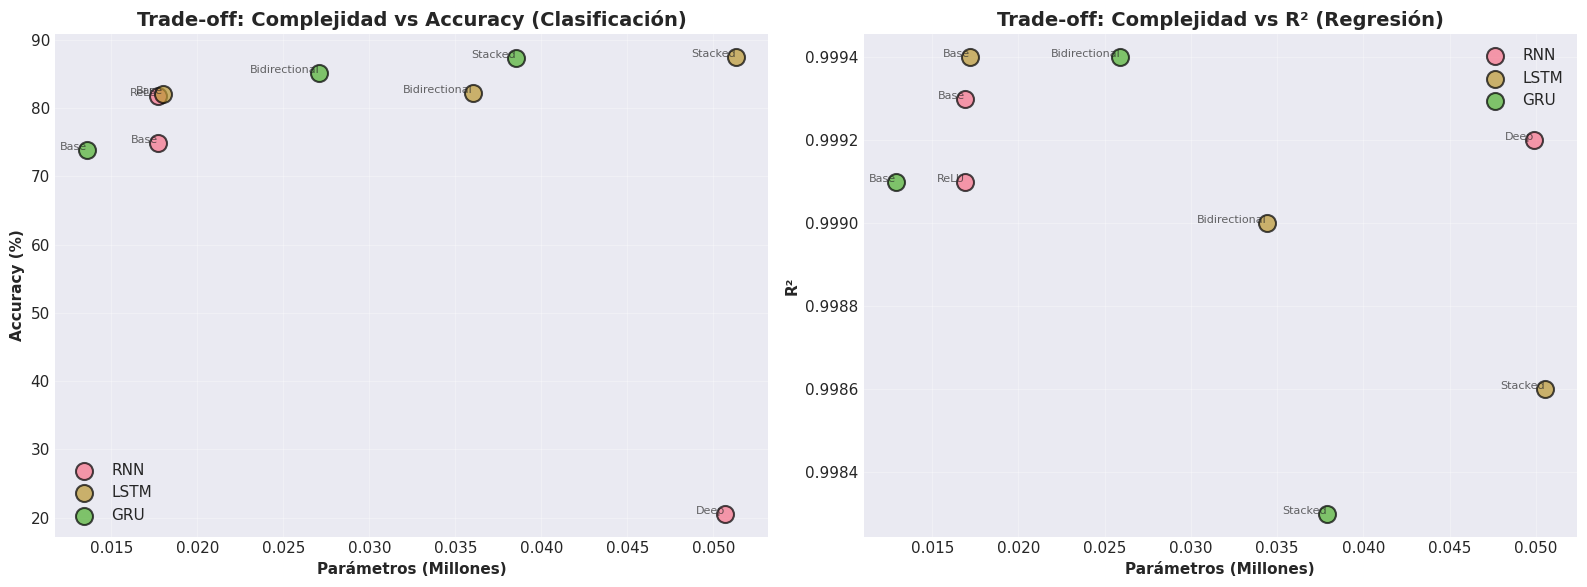


💡 Observaciones:
   • Modelo más eficiente (clasificación): GRU_Base
     (73.89% con 0.0136M parámetros)
   • Mayor complejidad (clasificación): LSTM_Stacked con 0.0513M parámetros
   • Menor complejidad (clasificación): GRU_Base con 0.0136M parámetros


In [17]:
# Scatter plot: Parámetros vs Accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Clasificación
for arch in df_class['Arquitectura'].unique():
    data = df_class[df_class['Arquitectura'] == arch]
    axes[0].scatter(data['Parámetros (M)'], data['Accuracy (%)'], 
                   label=arch, s=150, alpha=0.7, edgecolors='black', linewidth=1.5)
    for idx, row in data.iterrows():
        axes[0].annotate(row['Modelo'].split('_', 1)[1], 
                        (row['Parámetros (M)'], row['Accuracy (%)']),
                        fontsize=8, ha='right', alpha=0.7)

axes[0].set_xlabel('Parámetros (Millones)', fontweight='bold')
axes[0].set_ylabel('Accuracy (%)', fontweight='bold')
axes[0].set_title('Trade-off: Complejidad vs Accuracy (Clasificación)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Regresión
for arch in df_reg['Arquitectura'].unique():
    data = df_reg[df_reg['Arquitectura'] == arch]
    axes[1].scatter(data['Parámetros (M)'], data['R²'], 
                   label=arch, s=150, alpha=0.7, edgecolors='black', linewidth=1.5)
    for idx, row in data.iterrows():
        axes[1].annotate(row['Modelo'].split('_', 1)[1], 
                        (row['Parámetros (M)'], row['R²']),
                        fontsize=8, ha='right', alpha=0.7)

axes[1].set_xlabel('Parámetros (Millones)', fontweight='bold')
axes[1].set_ylabel('R²', fontweight='bold')
axes[1].set_title('Trade-off: Complejidad vs R² (Regresión)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figures/analisis_tradeoff_complejidad.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Observaciones:")
# Calcular eficiencia (accuracy por millón de parámetros)
df_class['Eficiencia'] = df_class['Accuracy (%)'] / df_class['Parámetros (M)']
most_efficient_idx = df_class['Eficiencia'].idxmax()
print(f"   • Modelo más eficiente (clasificación): {df_class.loc[most_efficient_idx, 'Modelo']}")
print(f"     ({df_class.loc[most_efficient_idx, 'Accuracy (%)']:.2f}% con {df_class.loc[most_efficient_idx, 'Parámetros (M)']:.4f}M parámetros)")
print(f"   • Mayor complejidad (clasificación): {df_class.loc[df_class['Parámetros (M)'].idxmax(), 'Modelo']} con {df_class['Parámetros (M)'].max():.4f}M parámetros")
print(f"   • Menor complejidad (clasificación): {df_class.loc[df_class['Parámetros (M)'].idxmin(), 'Modelo']} con {df_class['Parámetros (M)'].min():.4f}M parámetros")

## 📸 Visualizar Matrices de Confusión

🎯 TOP 3 MODELOS DE CLASIFICACIÓN:

📊 LSTM_Stacked


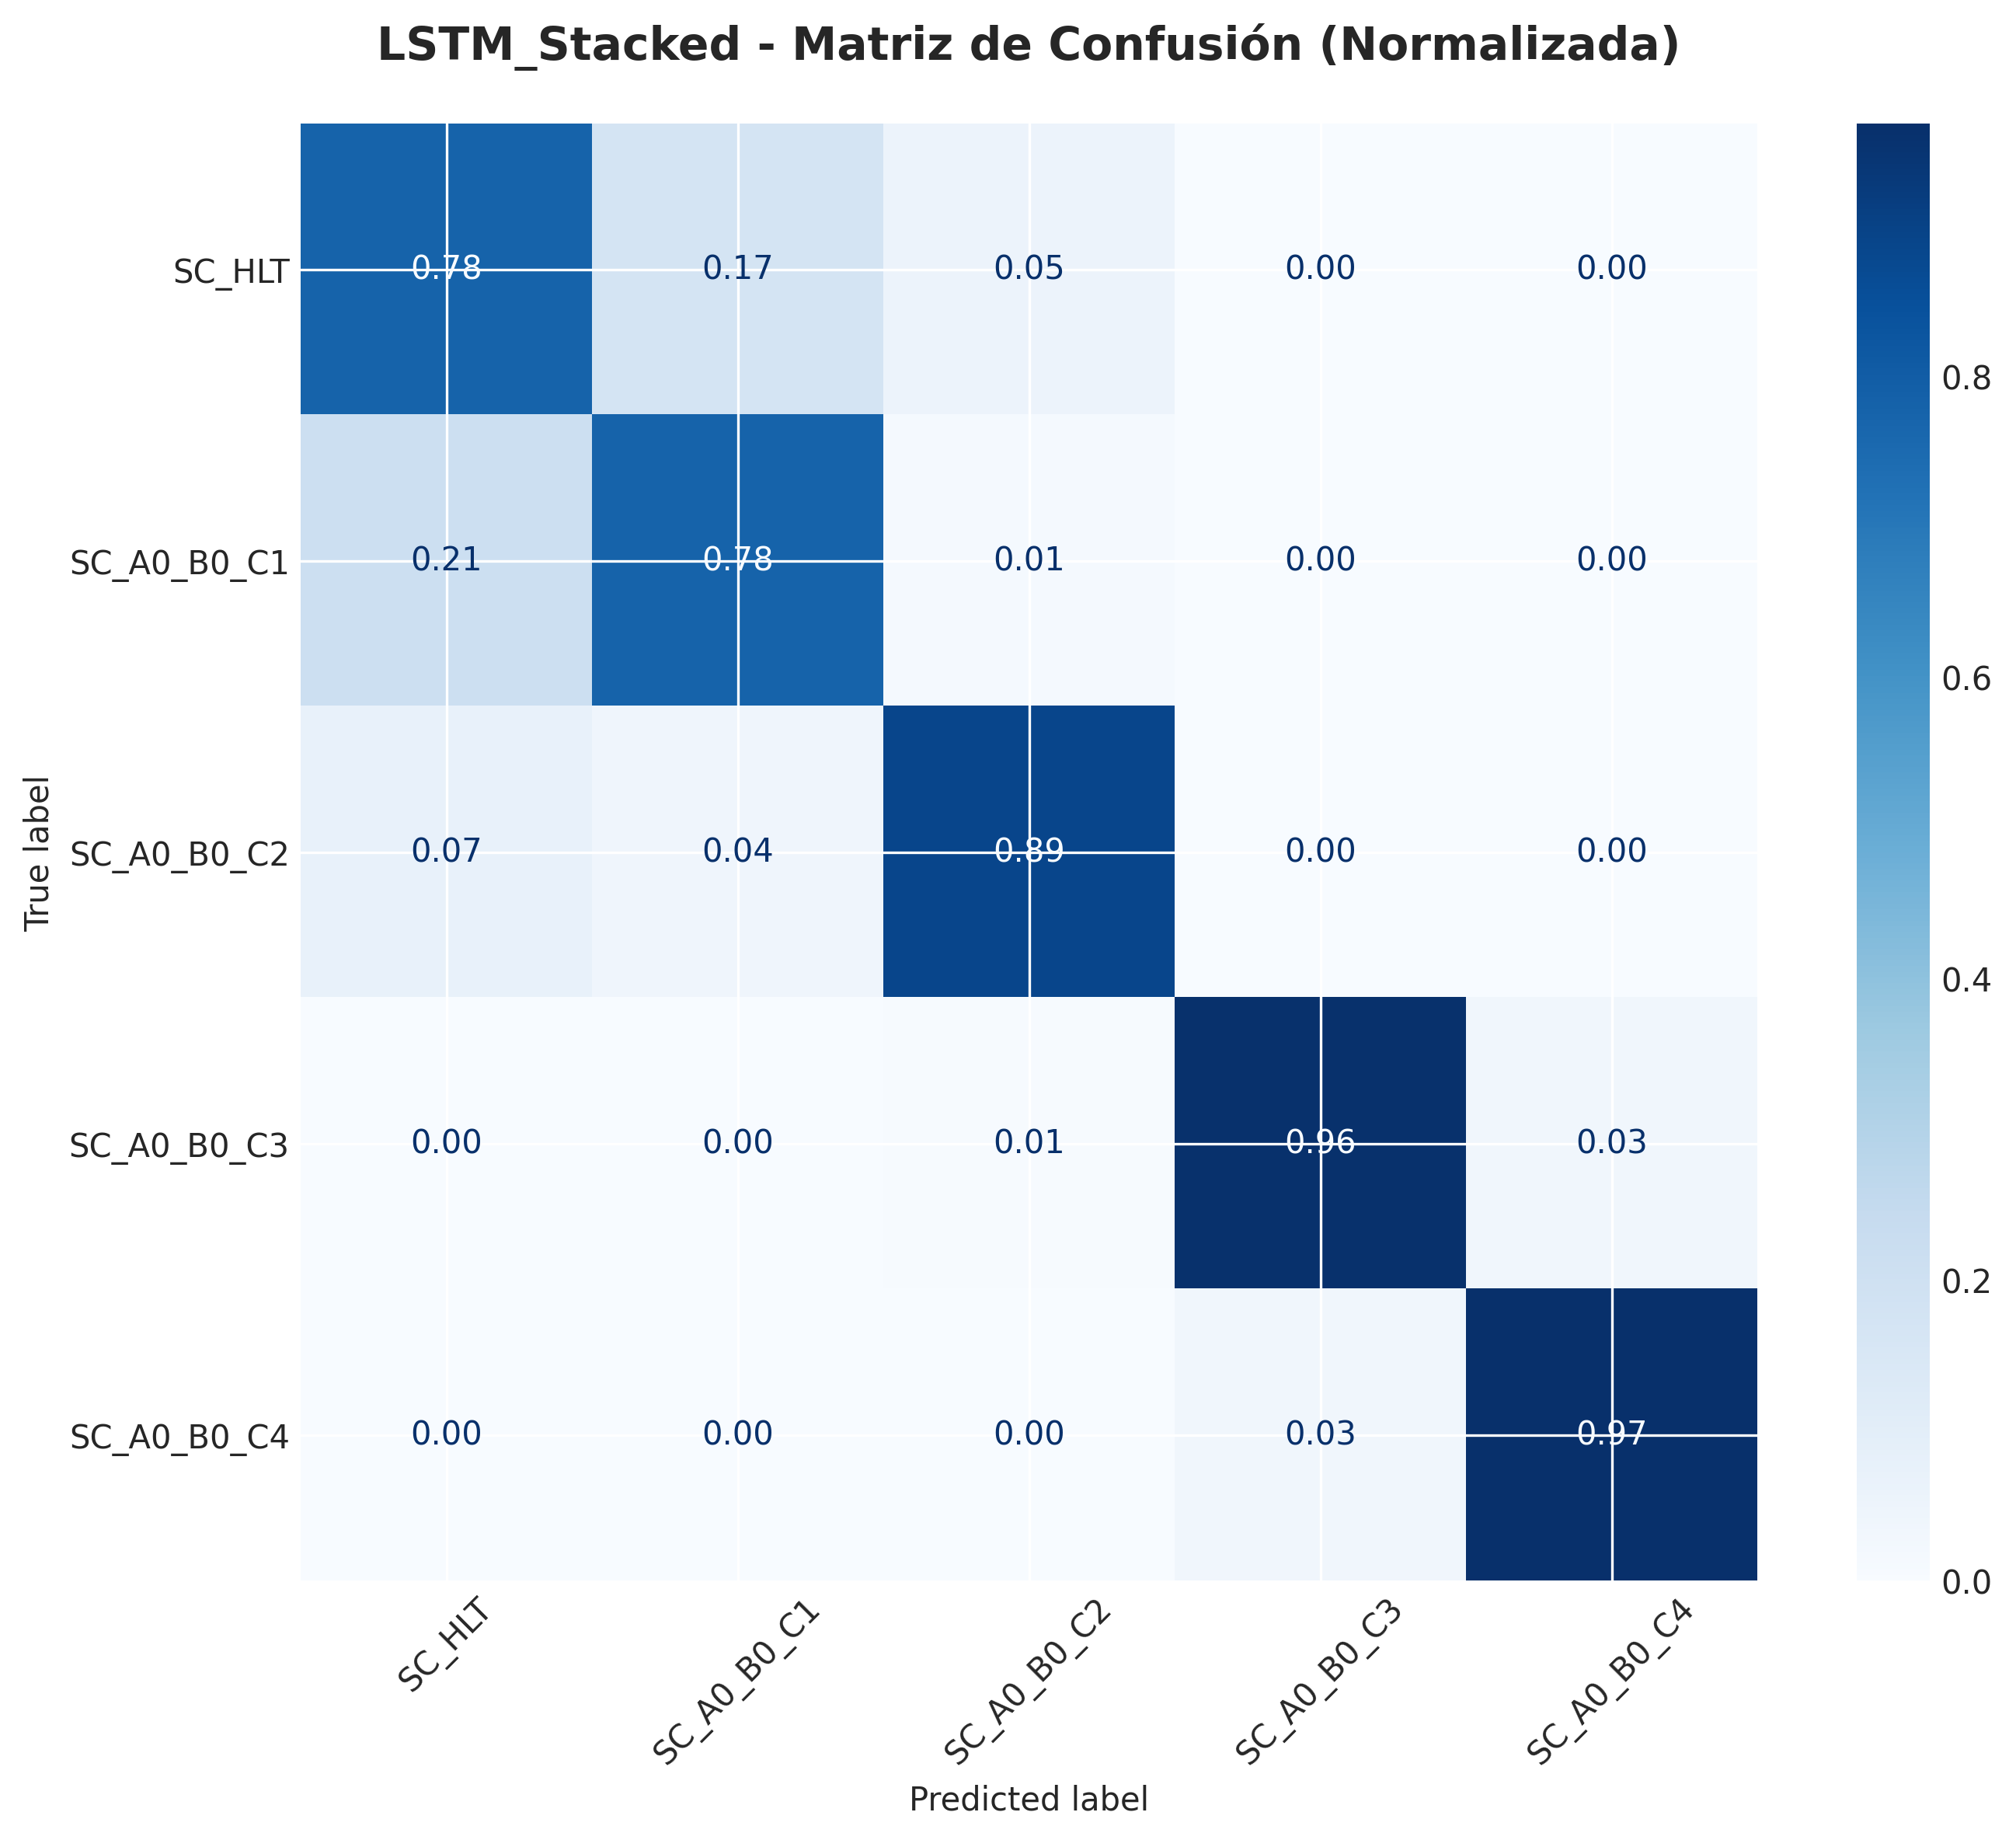


📊 GRU_Stacked


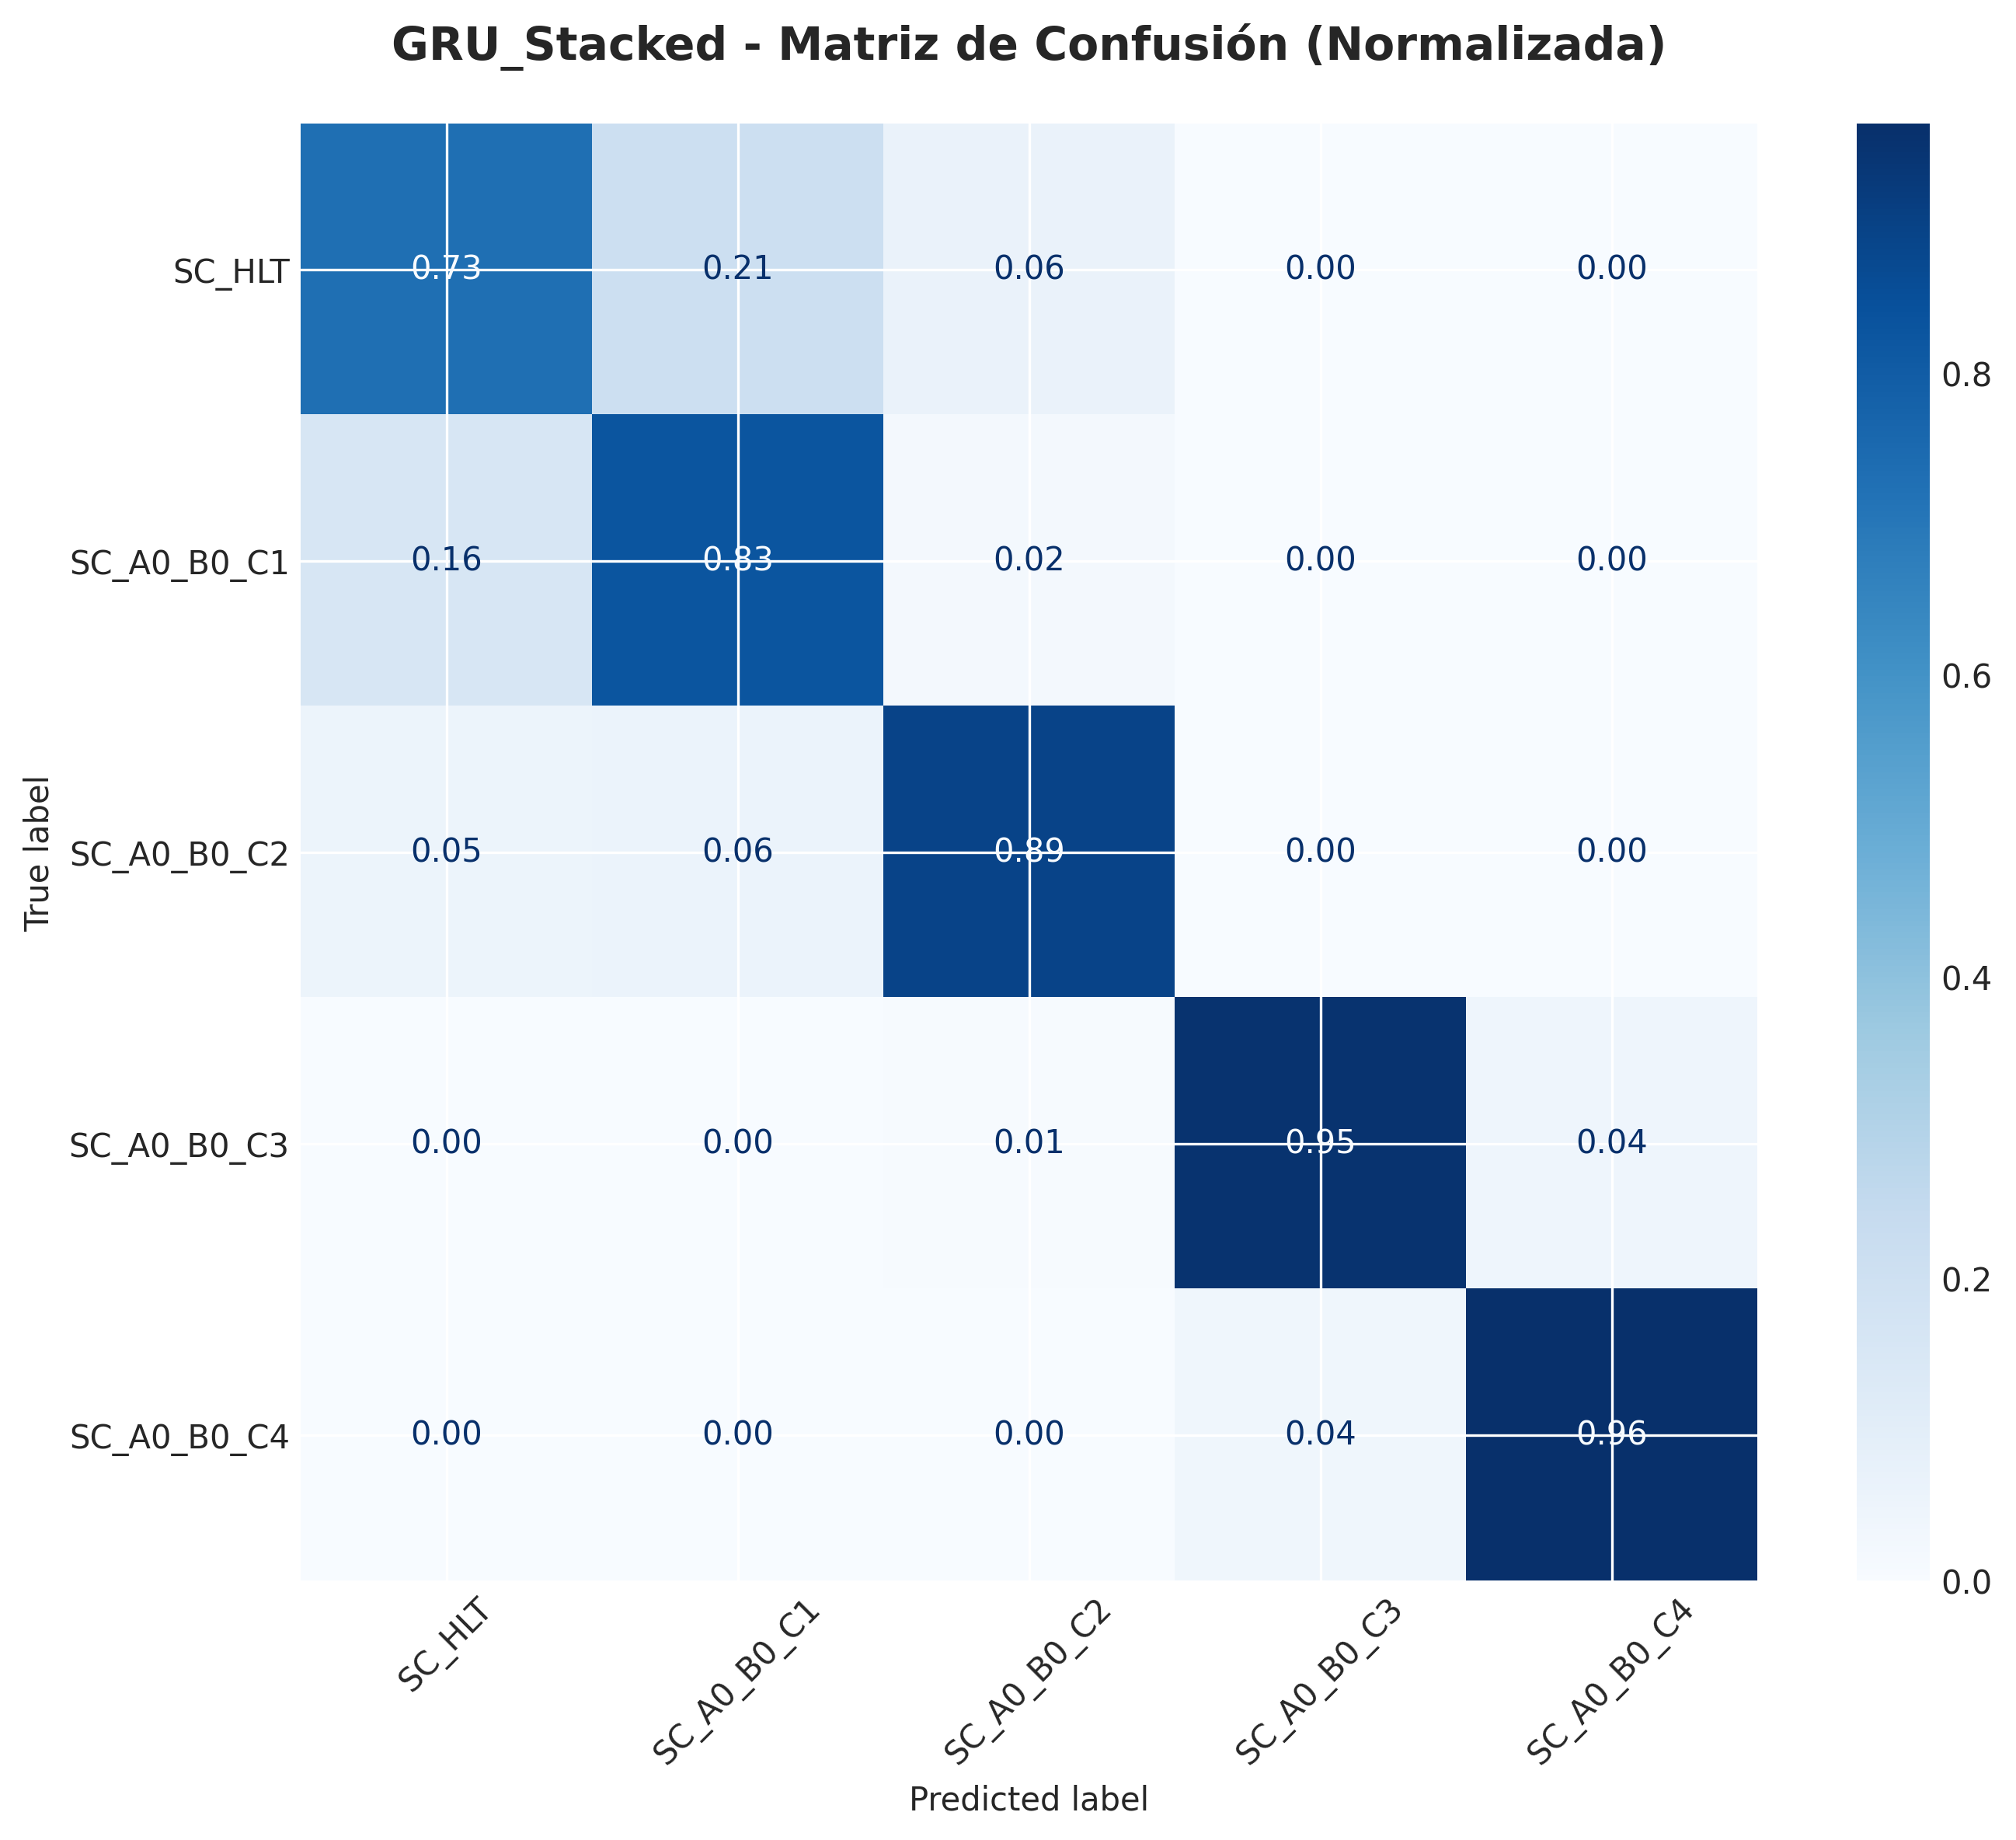


📊 GRU_Bidirectional


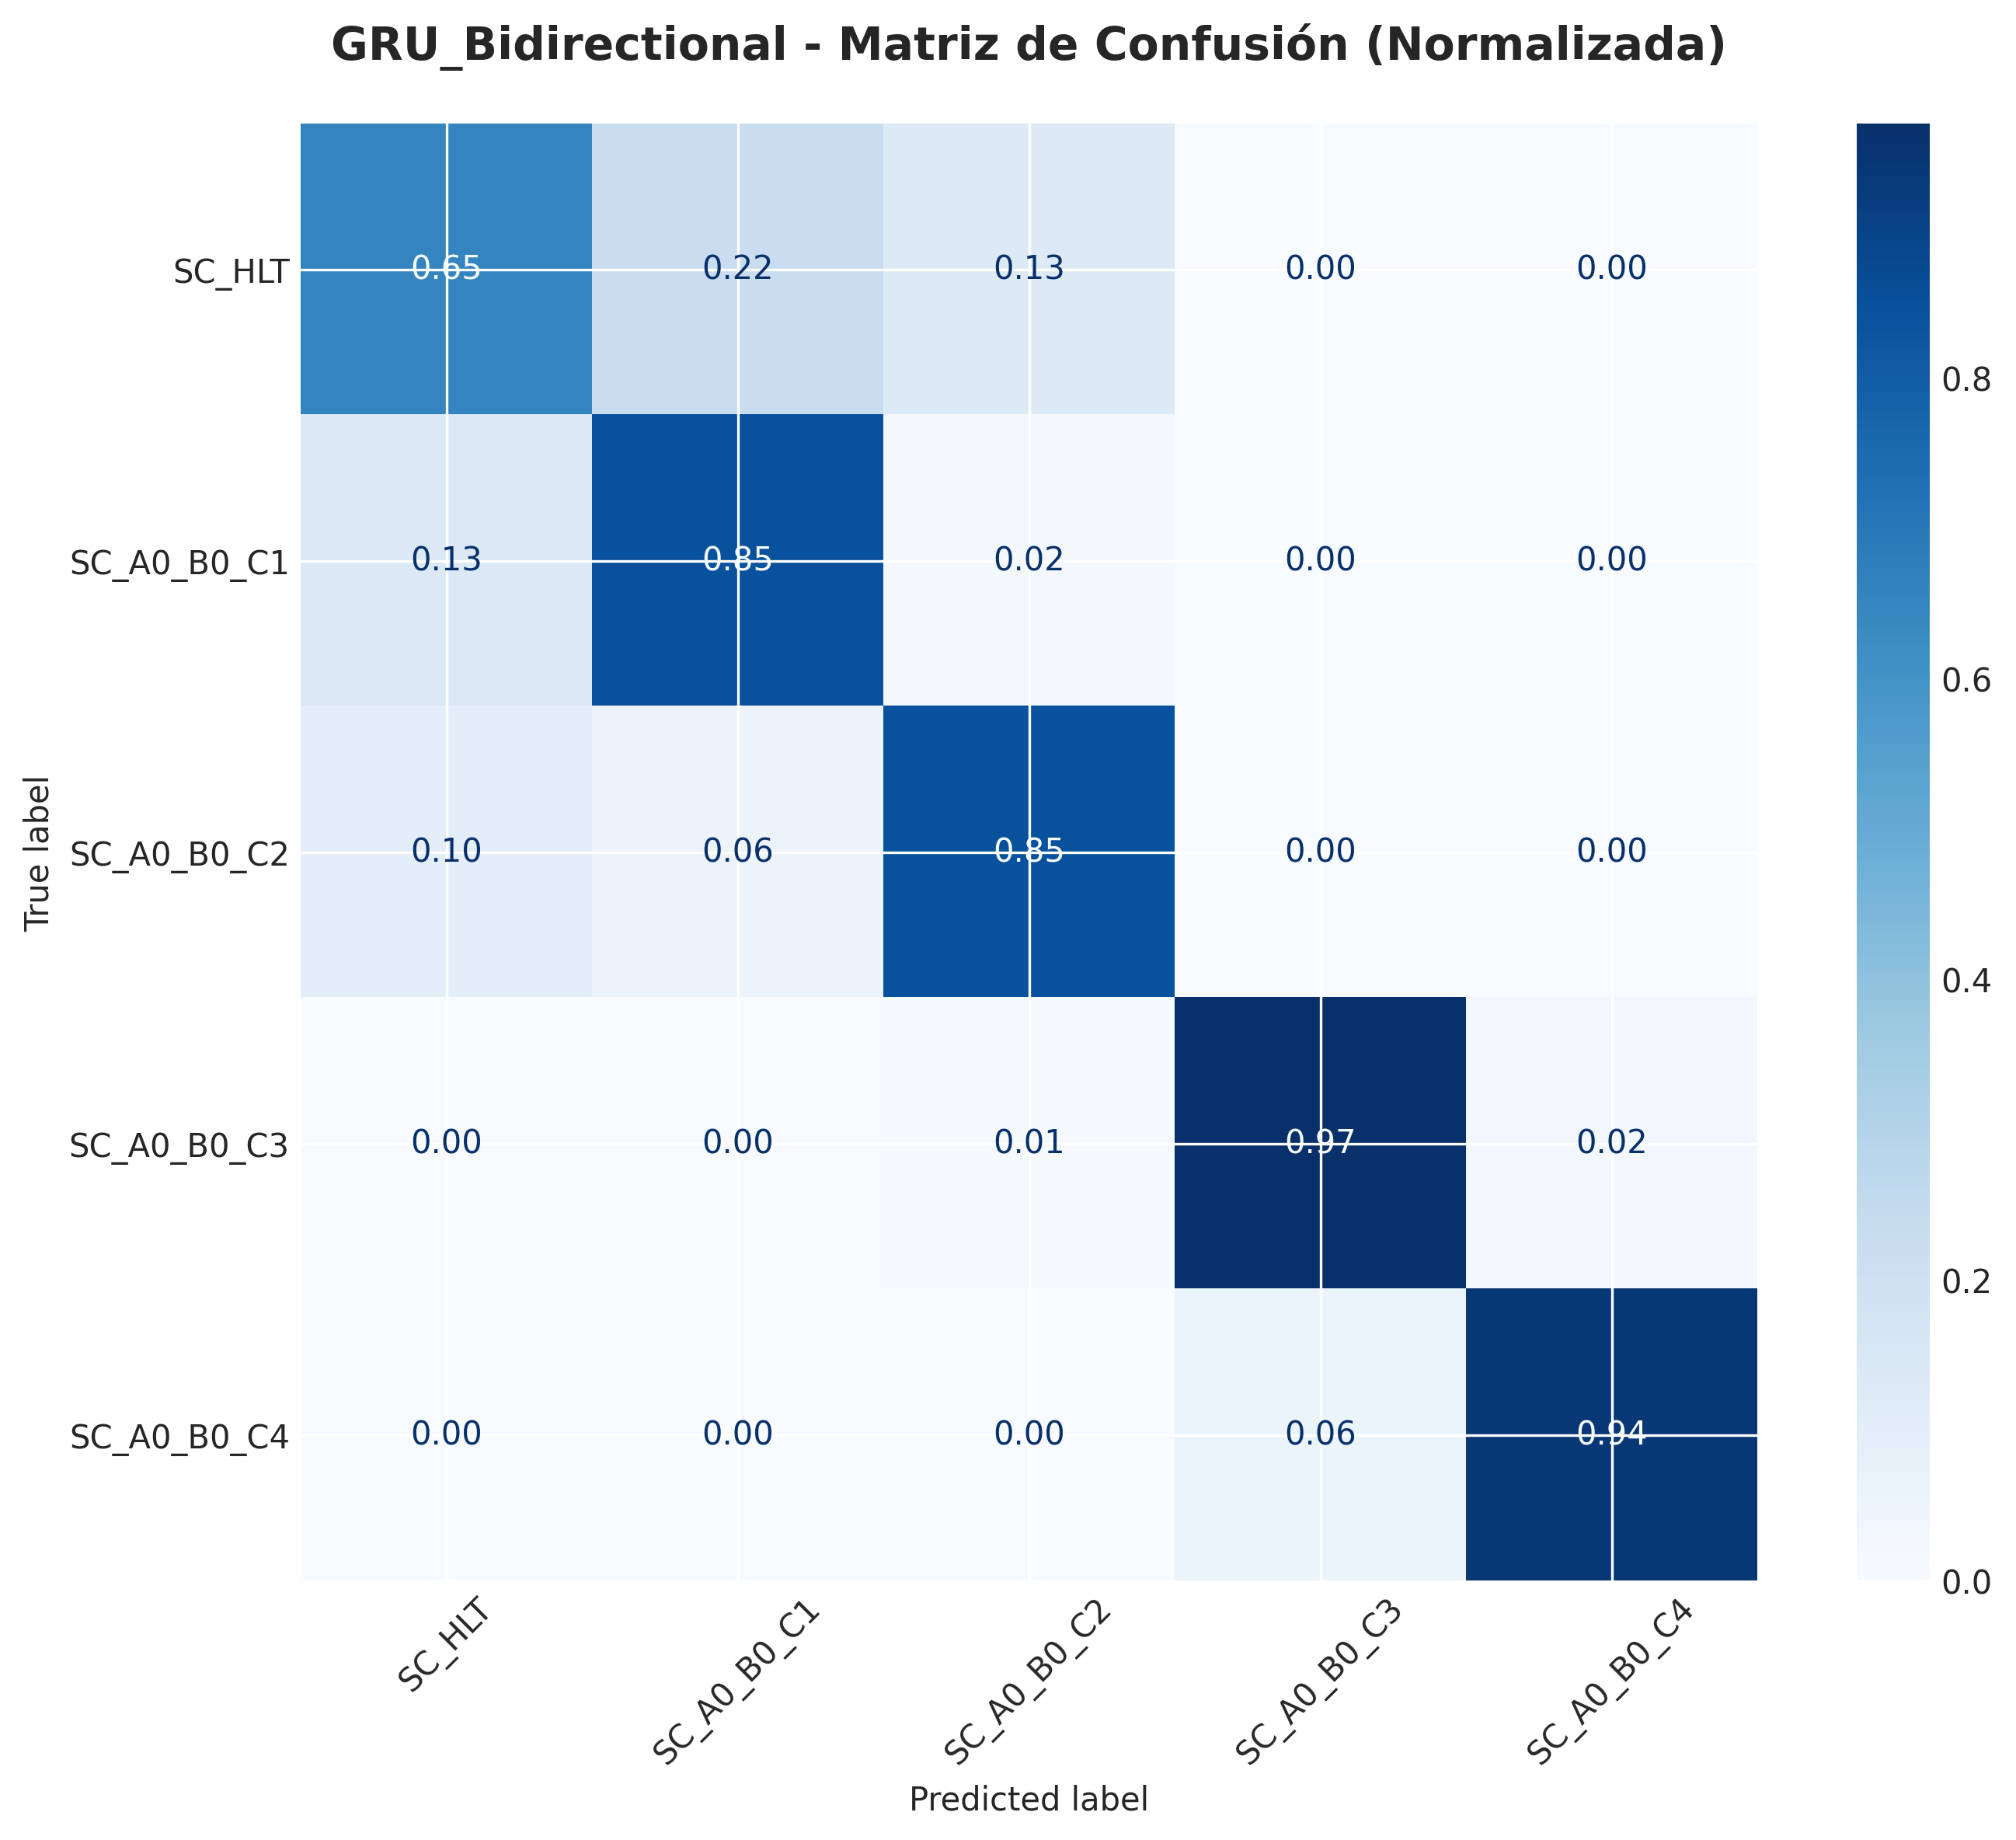

In [18]:
# Mostrar las mejores 3 matrices de confusión
top3 = df_class.nlargest(3, 'Accuracy (%)')['Modelo'].values

print("🎯 TOP 3 MODELOS DE CLASIFICACIÓN:")
print("=" * 80)

for modelo in top3:
    print(f"\n📊 {modelo}")
    img_path = f'figures/{modelo}_classification_confusion_matrix.png'
    if Path(img_path).exists():
        display(Image(filename=img_path, width=500))
    else:
        print(f"   ⚠️ Imagen no encontrada: {img_path}")

## 📈 Visualizar Curvas de Entrenamiento

🏆 MEJOR MODELO: LSTM_Stacked
   • Accuracy: 87.47%
   • F1-Score: 87.50%
   • Parámetros: 0.0513M


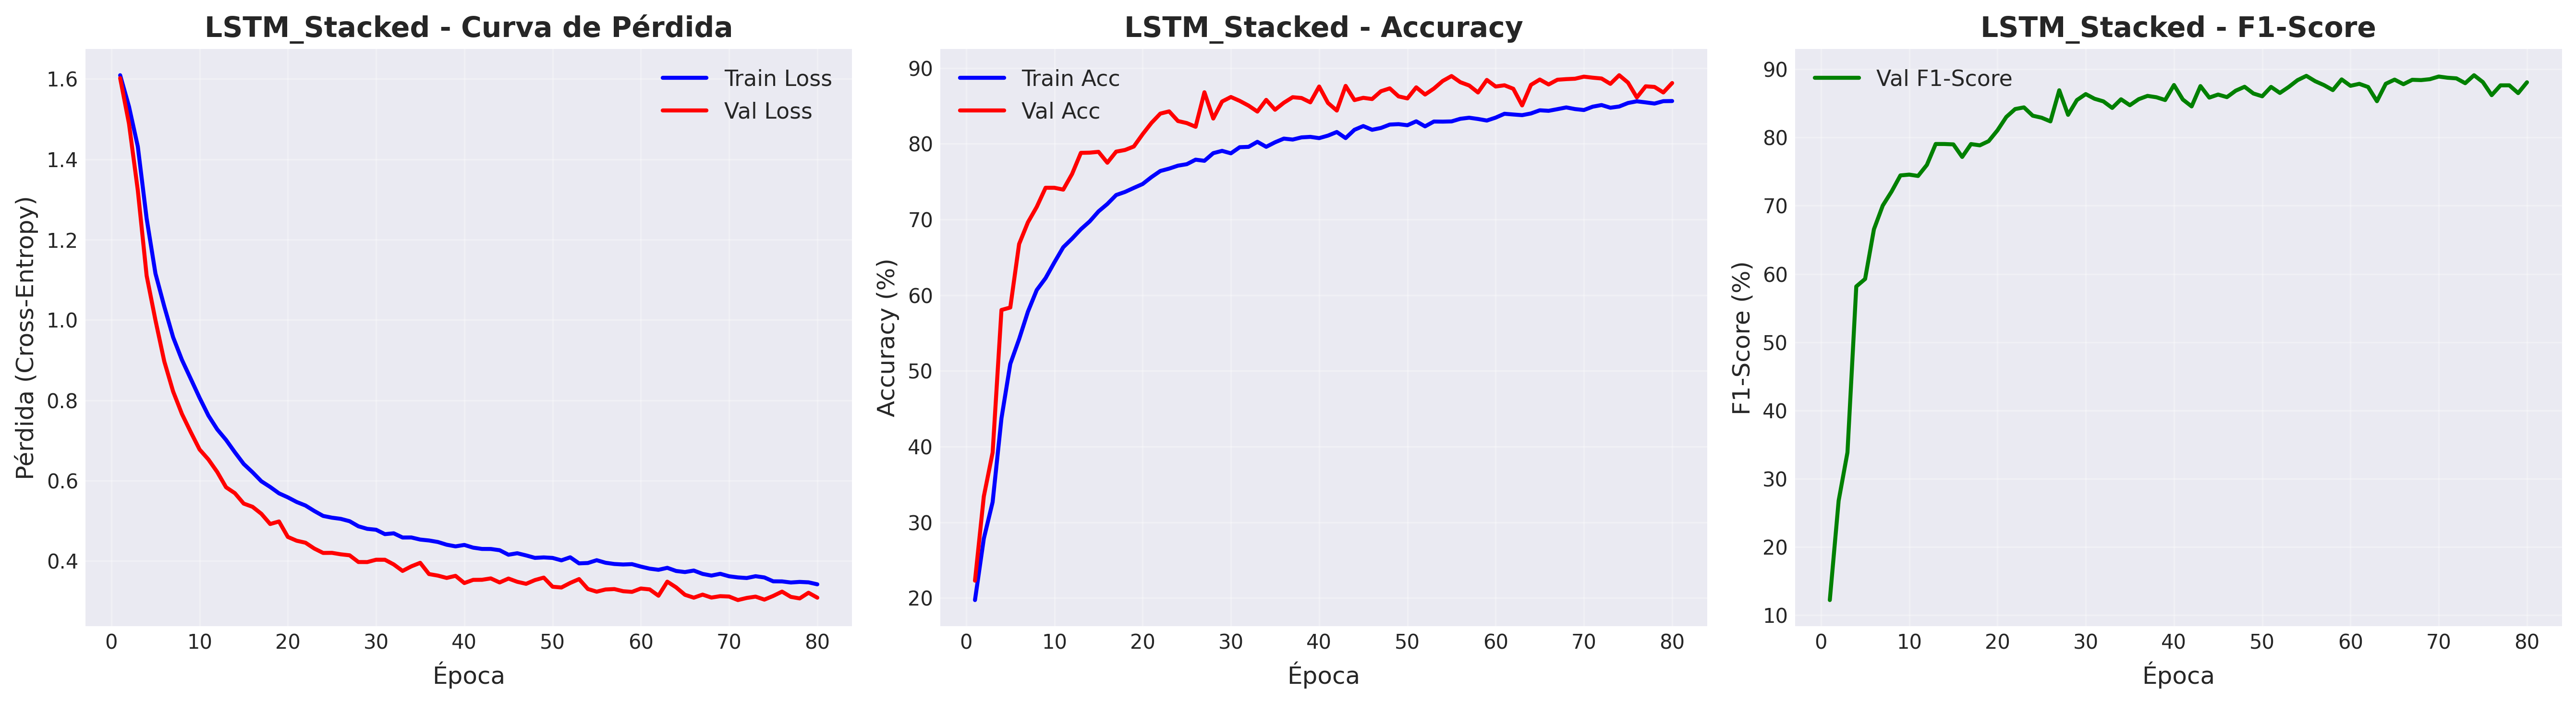

In [19]:
# Mostrar curvas de entrenamiento del mejor modelo
best_model = df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Modelo']

print(f"🏆 MEJOR MODELO: {best_model}")
print("=" * 80)
print(f"   • Accuracy: {df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Accuracy (%)']:.2f}%")
print(f"   • F1-Score: {df_class.loc[df_class['Accuracy (%)'].idxmax(), 'F1-Score (%)']:.2f}%")
print(f"   • Parámetros: {df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Parámetros (M)']:.4f}M")

img_path = f'figures/{best_model}_classification_history.png'
if Path(img_path).exists():
    display(Image(filename=img_path, width=900))
else:
    print(f"   ⚠️ Imagen no encontrada: {img_path}")

## 📈 Visualizar Predicciones de Regresión

🏆 MEJOR MODELO DE REGRESIÓN: LSTM_Base
   • R²: 0.9994
   • RMSE: 0.0247
   • MAE: 0.0197

📊 Predicciones vs Valores Reales:


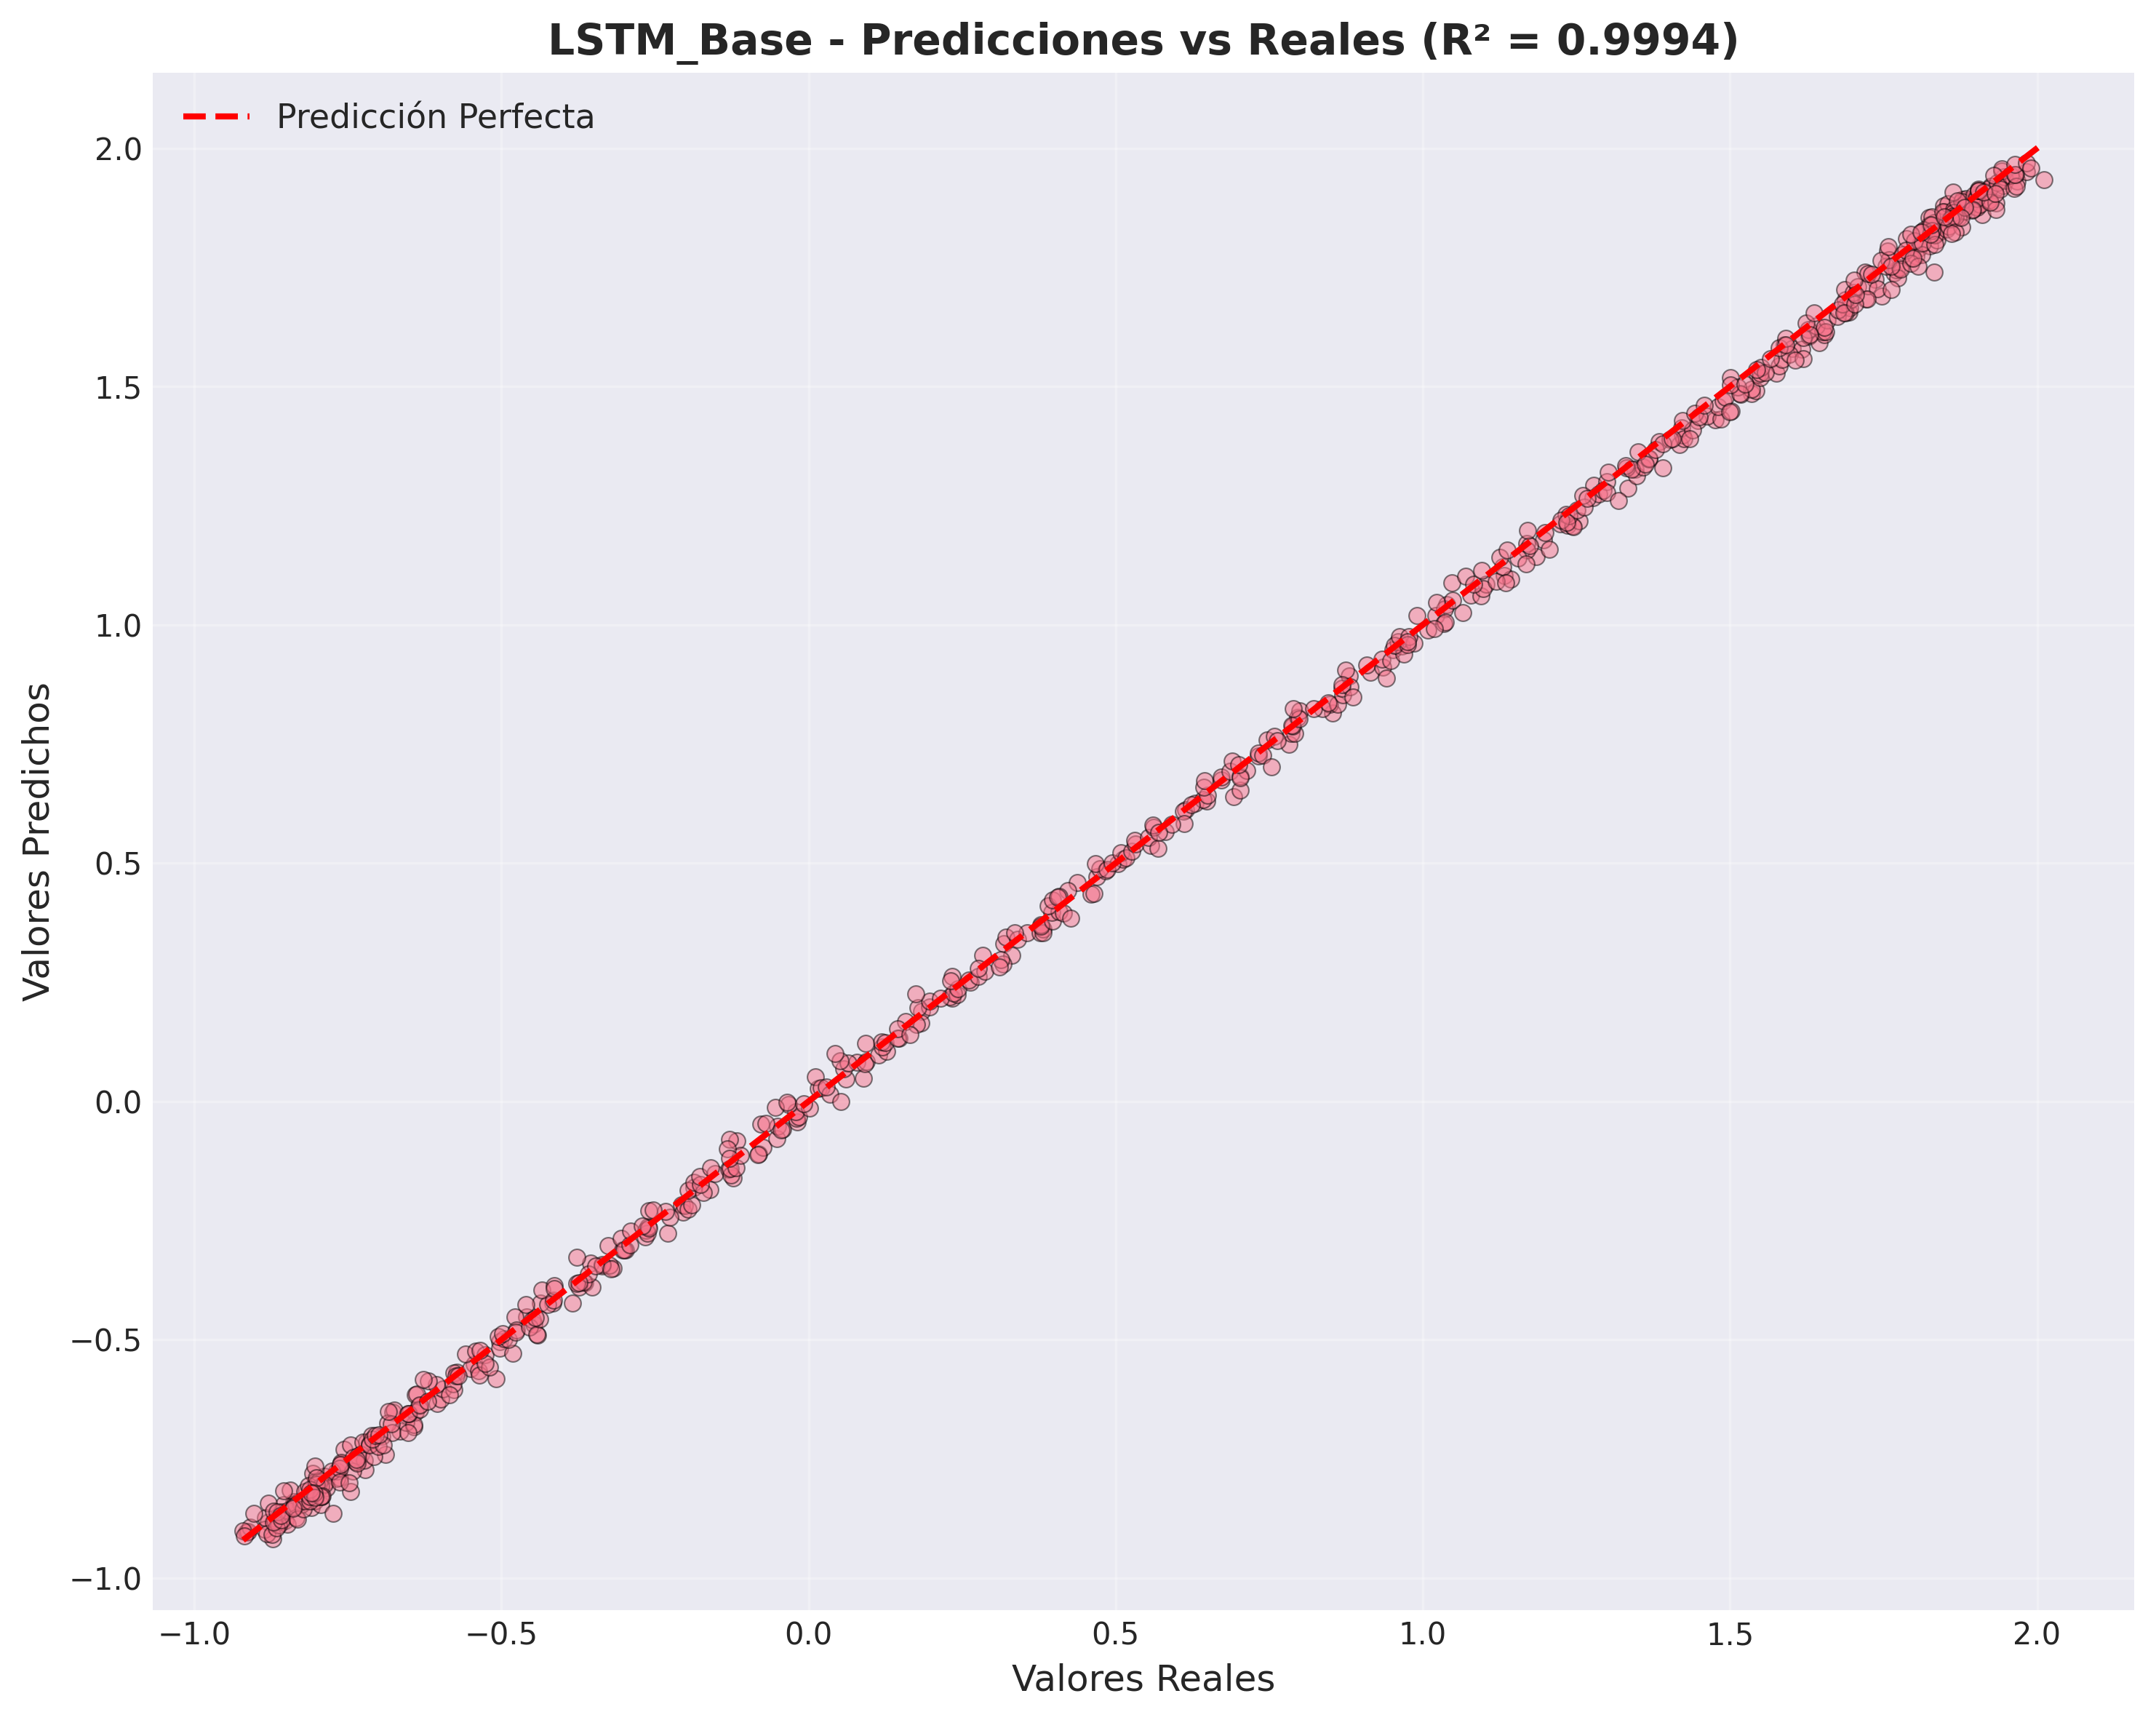


📈 Serie Temporal:


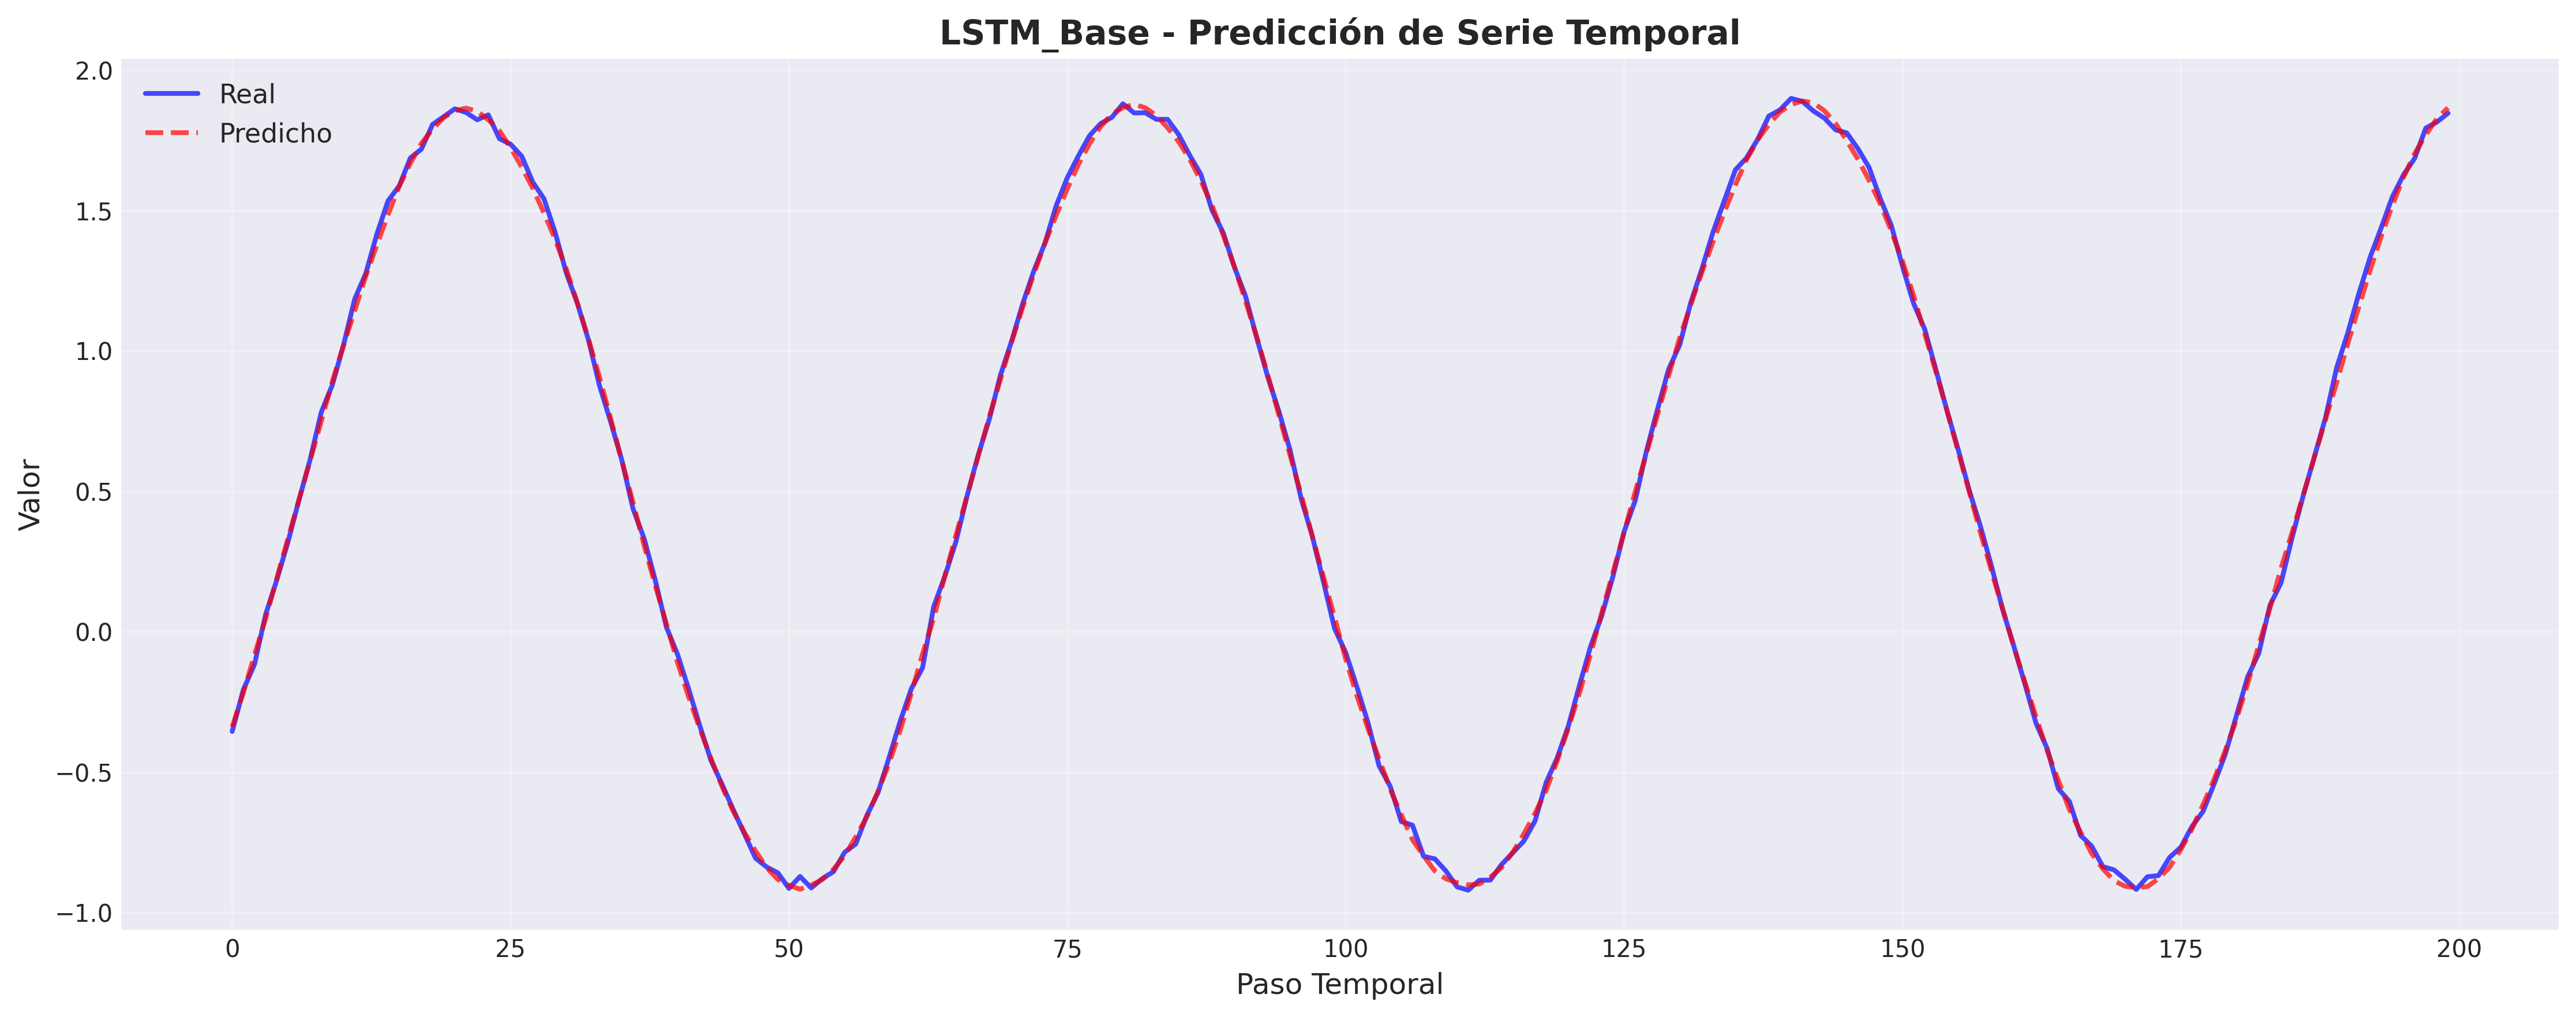

In [20]:
# Mostrar predicciones del mejor modelo de regresión
best_reg_model = df_reg.loc[df_reg['R²'].idxmax(), 'Modelo']

print(f"🏆 MEJOR MODELO DE REGRESIÓN: {best_reg_model}")
print("=" * 80)
print(f"   • R²: {df_reg.loc[df_reg['R²'].idxmax(), 'R²']:.4f}")
print(f"   • RMSE: {df_reg.loc[df_reg['R²'].idxmax(), 'RMSE']:.4f}")
print(f"   • MAE: {df_reg.loc[df_reg['R²'].idxmax(), 'MAE']:.4f}")

print("\n📊 Predicciones vs Valores Reales:")
img_path = f'figures/{best_reg_model}_regression_predictions.png'
if Path(img_path).exists():
    display(Image(filename=img_path, width=600))

print("\n📈 Serie Temporal:")
img_path = f'figures/{best_reg_model}_regression_timeseries.png'
if Path(img_path).exists():
    display(Image(filename=img_path, width=900))

## 📊 Comparación General de Modelos

📊 COMPARACIÓN GENERAL - CLASIFICACIÓN


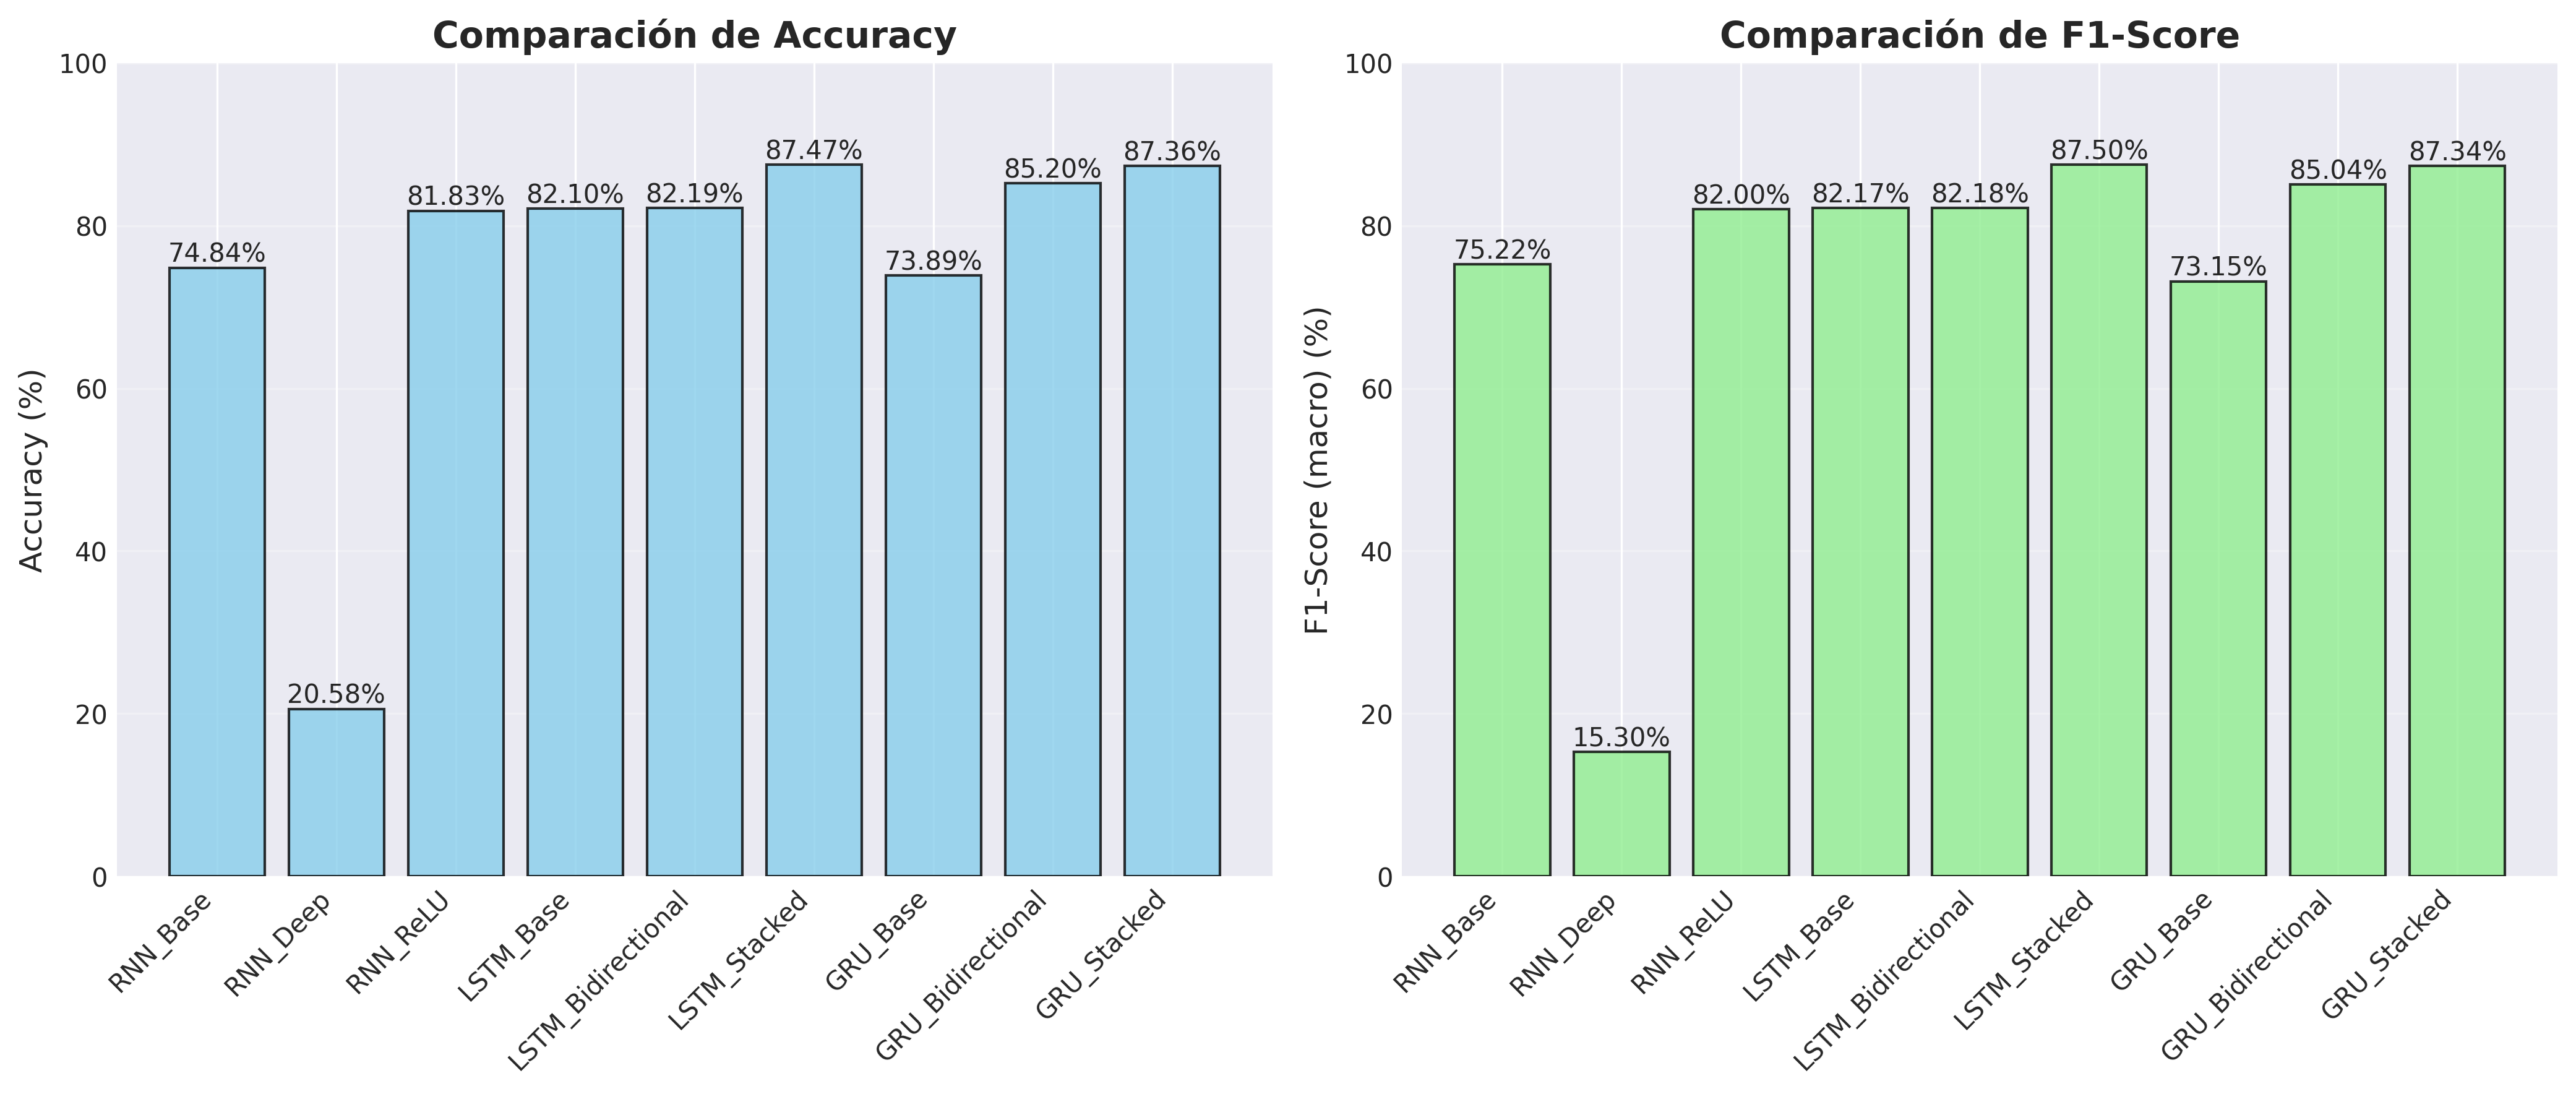


📊 COMPARACIÓN GENERAL - REGRESIÓN


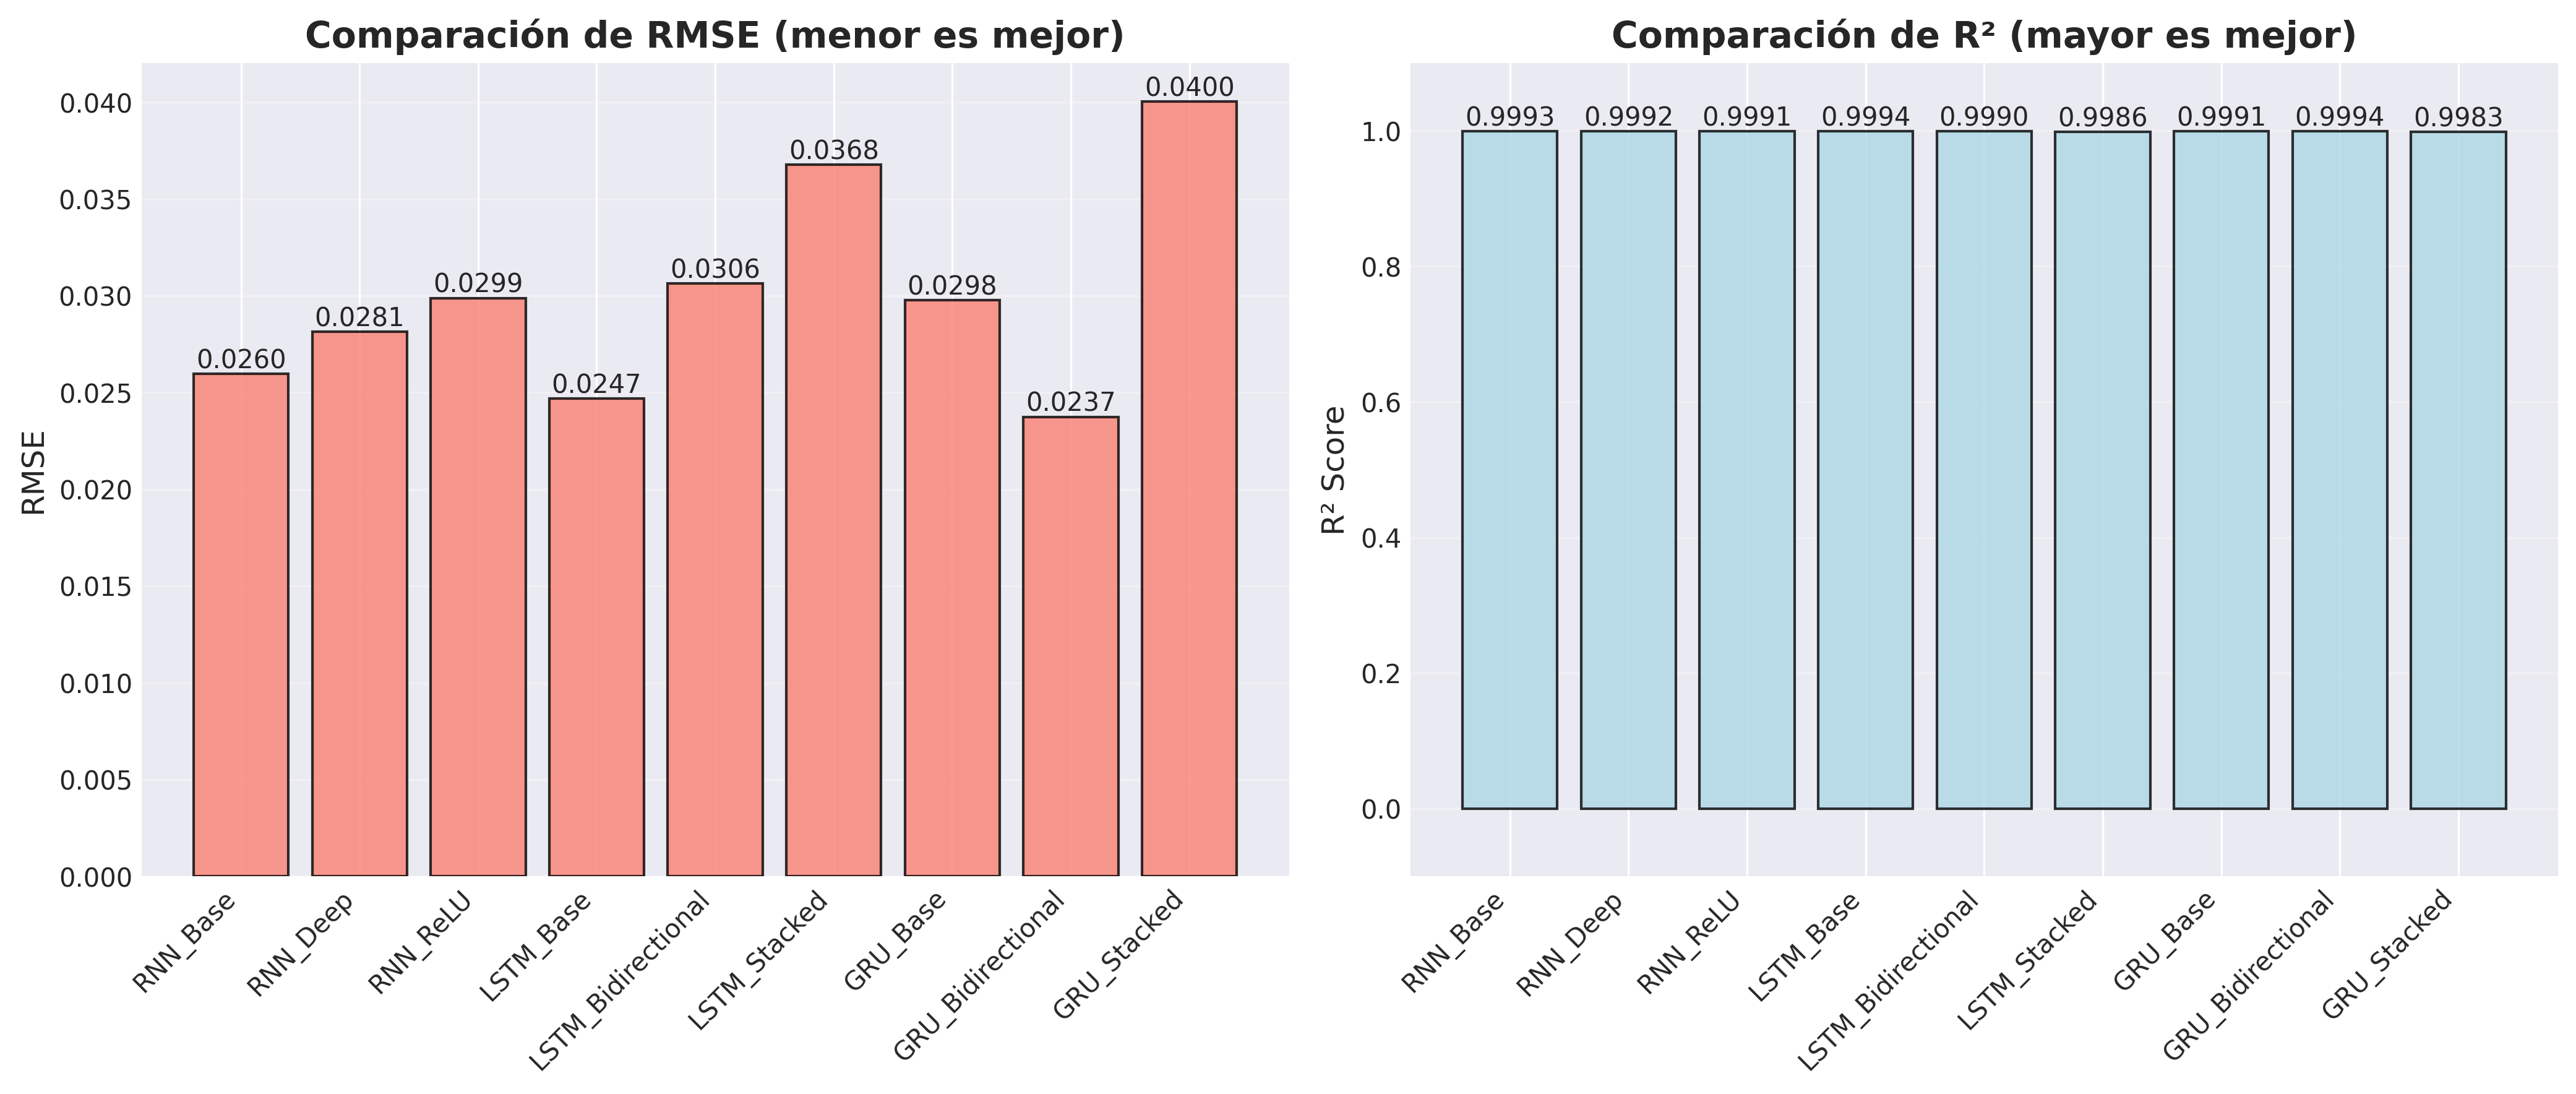

In [21]:
print("📊 COMPARACIÓN GENERAL - CLASIFICACIÓN")
img_path = 'figures/classification_model_comparison.png'
if Path(img_path).exists():
    display(Image(filename=img_path, width=1000))

print("\n📊 COMPARACIÓN GENERAL - REGRESIÓN")
img_path = 'figures/regression_model_comparison.png'
if Path(img_path).exists():
    display(Image(filename=img_path, width=1000))

## 📝 Resumen Ejecutivo para Reporte

In [22]:
print("\n" + "=" * 80)
print("📋 RESUMEN EJECUTIVO PARA REPORTE IMRA")
print("=" * 80)

print("\n🎯 CLASIFICACIÓN - Detección de Fallas en Motor")
print("-" * 80)
print(f"• Dataset: 5 clases (SC_HLT, SC_A0_B0_C1-4), 3 features, ventanas de 64 timesteps")
print(f"• Mejor modelo: {df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Modelo']}")
print(f"  - Accuracy: {df_class['Accuracy (%)'].max():.2f}%")
print(f"  - F1-Score: {df_class['F1-Score (%)'].max():.2f}%")
print(f"  - Parámetros: {df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Parámetros (M)']:.4f}M")

print(f"\n• Peor modelo: {df_class.loc[df_class['Accuracy (%)'].idxmin(), 'Modelo']}")
print(f"  - Accuracy: {df_class['Accuracy (%)'].min():.2f}%")
print(f"  - Explicación: Problema de gradiente evanescente en RNN profunda")

print(f"\n• Arquitectura ganadora: {arch_comparison[('Accuracy (%)', 'mean')].idxmax()}")
print(f"  - Accuracy promedio: {arch_comparison[('Accuracy (%)', 'mean')].max():.2f}% ± {arch_comparison.loc[arch_comparison[('Accuracy (%)', 'mean')].idxmax(), ('Accuracy (%)', 'std')]:.2f}%")

print("\n🎯 REGRESIÓN - Predicción de Series Temporales")
print("-" * 80)
print(f"• Dataset: Serie temporal sintética, 1000 puntos, función seno")
print(f"• Mejor modelo: {df_reg.loc[df_reg['R²'].idxmax(), 'Modelo']}")
print(f"  - R²: {df_reg['R²'].max():.4f}")
print(f"  - RMSE: {df_reg.loc[df_reg['R²'].idxmax(), 'RMSE']:.4f}")
print(f"  - MAE: {df_reg.loc[df_reg['R²'].idxmax(), 'MAE']:.4f}")

print(f"\n• Modelo más eficiente: {df_reg.loc[df_reg['RMSE'].idxmin(), 'Modelo']}")
print(f"  - RMSE: {df_reg['RMSE'].min():.4f} (mejor error)")

print("\n✅ VALIDACIÓN DE HIPÓTESIS")
print("-" * 80)
print(f"1. LSTM/GRU > RNN: {'✅ CONFIRMADA' if arch_comparison.loc['LSTM', ('Accuracy (%)', 'mean')] > arch_comparison.loc['RNN', ('Accuracy (%)', 'mean')] else '❌ RECHAZADA'}")
print(f"   • LSTM promedio: {arch_comparison.loc['LSTM', ('Accuracy (%)', 'mean')]:.2f}%")
print(f"   • RNN promedio: {arch_comparison.loc['RNN', ('Accuracy (%)', 'mean')]:.2f}%")

print(f"\n2. Bidireccionalidad mejora: {'✅ CONFIRMADA' if mejora_bi > 0 else '❌ RECHAZADA'}")
print(f"   • Mejora: {mejora_bi:+.2f}%")

print(f"\n3. Stacking mejora: {'✅ CONFIRMADA' if mejora_stack > 0 else '❌ RECHAZADA'}")
print(f"   • Mejora: {mejora_stack:+.2f}%")

print(f"\n4. RNN Deep sufre degradación: {'✅ CONFIRMADA' if degradacion < -10 else '⚠️ PARCIAL' if degradacion < 0 else '❌ RECHAZADA'}")
print(f"   • Degradación: {degradacion:+.2f}%")

print("\n💡 CONCLUSIONES CLAVE")
print("-" * 80)
print("1. Las arquitecturas con compuertas (LSTM/GRU) superan significativamente a RNN vanilla")
print("2. El stacking de capas mejora el desempeño cuando hay dropout apropiado")
print("3. La bidireccionalidad captura mejor el contexto temporal completo")
print("4. GRU ofrece un buen trade-off entre desempeño y complejidad computacional")
print("5. RNN profundas sufren severamente del problema de gradiente evanescente")

print("\n📚 ARCHIVOS PARA INCLUIR EN REPORTE")
print("-" * 80)
print("• Tablas: results/classification_results.tex + regression_results.tex")
print("• Figuras principales:")
print("  - classification_model_comparison.png")
print("  - regression_model_comparison.png")
print(f"  - {df_class.loc[df_class['Accuracy (%)'].idxmax(), 'Modelo']}_classification_confusion_matrix.png")
print(f"  - {df_reg.loc[df_reg['R²'].idxmax(), 'Modelo']}_regression_predictions.png")
print("• Figuras análisis: todas en figures/analisis_*.png")

print("\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETO - LISTO PARA REDACTAR REPORTE")
print("=" * 80)


📋 RESUMEN EJECUTIVO PARA REPORTE IMRA

🎯 CLASIFICACIÓN - Detección de Fallas en Motor
--------------------------------------------------------------------------------
• Dataset: 5 clases (SC_HLT, SC_A0_B0_C1-4), 3 features, ventanas de 64 timesteps
• Mejor modelo: LSTM_Stacked
  - Accuracy: 87.47%
  - F1-Score: 87.50%
  - Parámetros: 0.0513M

• Peor modelo: RNN_Deep
  - Accuracy: 20.58%
  - Explicación: Problema de gradiente evanescente en RNN profunda

• Arquitectura ganadora: LSTM
  - Accuracy promedio: 83.92% ± 3.08%

🎯 REGRESIÓN - Predicción de Series Temporales
--------------------------------------------------------------------------------
• Dataset: Serie temporal sintética, 1000 puntos, función seno
• Mejor modelo: LSTM_Base
  - R²: 0.9994
  - RMSE: 0.0247
  - MAE: 0.0197

• Modelo más eficiente: GRU_Bidirectional
  - RMSE: 0.0237 (mejor error)

✅ VALIDACIÓN DE HIPÓTESIS
--------------------------------------------------------------------------------
1. LSTM/GRU > RNN: ✅ CONFI

## 🎓 Siguiente Paso: Redactar Reporte IMRA

Con este análisis completado, ahora debes:

1. **Introducción** (1-2 páginas)
   - Contexto: Importancia de RNNs en análisis de señales temporales
   - Problema: Detección de fallas en motores y predicción temporal
   - Objetivos: Comparar RNN/LSTM/GRU y sus variantes
   - Hipótesis: Las presentadas en HIPOTESIS_Y_ANALISIS.md

2. **Metodología** (2-3 páginas)
   - Dataset: 5 clases, 3 features, estructura de carpetas
   - Preprocesamiento: Ventanas, normalización, splits
   - Arquitecturas: RNN/LSTM/GRU + variantes
   - Protocolo: 80 épocas, Adam, batch 64, etc.

3. **Resultados** (3-4 páginas)
   - Tabla I: Clasificación (copiar de classification_results.tex)
   - Tabla II: Regresión (copiar de regression_results.tex)
   - Figuras: Usar las generadas en figures/
   - Descripción: Reportar resultados objetivamente

4. **Análisis** (3-4 páginas)
   - Validar cada hipótesis con datos
   - Comparar arquitecturas (RNN vs LSTM vs GRU)
   - Analizar trade-offs (complejidad vs desempeño)
   - Discutir matrices de confusión (errores comunes)
   - Explicar degradación de RNN Deep

5. **Conclusiones** (1 página)
   - Resumir hallazgos principales
   - Responder objetivos
   - Limitaciones del estudio
   - Trabajo futuro

6. **Referencias**
   - Paper original de LSTM (Hochreiter & Schmidhuber, 1997)
   - Paper de GRU (Cho et al., 2014)
   - Documentación de PyTorch

---

**📝 Usa este notebook como referencia durante la redacción del reporte.**